In [183]:
from bs4 import BeautifulSoup
import os 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import re
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from statistics import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import pickle


In [188]:
folder_path = 'C:/Users/IMOE001/Downloads/data/data'
folder_path2 = 'C:/Users/IMOE001/Downloads/data/test' #small sample for testing 

In [189]:
from bs4 import BeautifulSoup

def extract_features(html_code):
    soup = BeautifulSoup(html_code, 'html.parser') # object of html code 
    features = {}
    
    car_info = soup.find('td', width='65%') # the first matching only 
    if car_info:
        features['اسم السيارة'] = car_info.find('h3').get_text(strip=True)  
        features['موديل السيارة'] = car_info.find('h5').get_text(strip=True)  
    
    car_price = soup.find('h5', class_='post-price')
    if car_price:
        for a_tag in car_price.find_all('a'): # return a list 
            a_tag.extract()
        features['سعر السيارة'] = car_price.get_text(strip=True) if car_price else None 
    
    car_characteristics = soup.find_all('tr', class_='list-row')
    for characteristic in car_characteristics:
        featurename_and_itsvalue = characteristic.find_all('td')
        feature_name = featurename_and_itsvalue[0].get_text(strip=True)
        feature_value = featurename_and_itsvalue[1].get_text(strip=True)
        features[feature_name] = feature_value    
    
    additions = soup.find('td', valign='top', text='إضافات')
    if additions:
        ul_element = additions.find_next('ul')
        li_elements = ul_element.find_all('li')

        list_of_additions = [li.get_text(strip=True) for li in li_elements if li.get_text(strip=True) != 'فتحة سقف']
        print(list_of_additions)
        num_additions = len(list_of_additions)
        features['Number_of_Additions'] = num_additions

        features['فتحة السقف'] = 1 if 'فتحة سقف' in [li.get_text(strip=True) for li in li_elements] else 0


    return features

In [190]:
all_data = [] 
for filename in os.listdir(folder_path):
    file_path =folder_path  + '/' + filename
    with open(file_path, 'r', encoding='utf-8') as file:
        html_code = file.read()
        data_of_one_sample = extract_features(html_code)
        print(f" Sample: {data_of_one_sample}")
        all_data.append(data_of_one_sample)

#all features => list of dictionarys 

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_14332\3458181762.py:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  additions = soup.find('td', valign='top', text='إضافات')


['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا اوبتيما', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '75000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-16', 'تاريخ إنتهاء الإعلان': '2017-09-15', 'Number_of_Additions': 7, 'فتحة السقف': 1}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا سورينتو', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'سكني', '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فيات 1998', 'موديل السيارة': 'موديل سنة 1998', 'سعر السيارة': '30000 شيكل', 'لون السيارة': 'ذهبي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '70000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '4', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-20', 'تاريخ إنتهاء الإعلان': '2017-09-19', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سكودا فابيا', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': 

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي i40', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '110000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1800', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-22', 'تاريخ إنتهاء الإعلان': '2017-09-21', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '90000 شيكل', 'لون السيارة': 'عدة الوان', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجي

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد فيستا', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '45000 شيكل', 'لون السيارة': 'بترولي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1250', 'عداد السيارة': '78000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-24', 'تاريخ إنتهاء الإعلان': '2017-09-13', 'Number_of_Additions': 4, 'فتحة السقف': 0}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'دايو رايسر', 'موديل السيارة': 'موديل سنة 1996', 'سعر السيارة': '21000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن باسات', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '190', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-29', 'تاريخ إنتهاء الإعلان': '2017-09-14', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مسجل CD', 'فرش جلد']
 Sample: {'اسم السيارة': 'فولكسفاجن ترانسبورتر', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '37000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكترون

 Sample: {}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو X3', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '215000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '43000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-05', 'تاريخ إنتهاء الإعلان': '2017-10-05', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد فيستا', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '67000 شيكل', 'لون السي

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي i25', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '60', 'عدد الركاب': '4+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-09', 'تاريخ إنتهاء الإعلان': '2017-10-09', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بيجو 307', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '38500 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخ

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا فورتي', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '59500 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '82000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-10', 'تاريخ إنتهاء الإعلان': '2017-10-10', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا ريو', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '3800 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'رمادي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-12', 'تاريخ إنتهاء الإعلان': '2017-10-12', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن طوارق', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '130000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج'

 Sample: {}
['مُكيّف', 'جهاز إنذار', 'مسجل CD']
 Sample: {'اسم السيارة': 'كيا بيكانتو', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '52000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1100', 'عداد السيارة': '20000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'صفر', 'إضافات': 'مُكيّفجهاز إنذارمسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-16', 'تاريخ إنتهاء الإعلان': '2017-10-16', 'Number_of_Additions': 3, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي سانتافيه', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '135000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور':

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2001', 'سعر السيارة': '37000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عداد السيارة': '٤٠٠٠٠٠', 'عدد الركاب': '١+٤', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد ثالثه', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-17', 'تاريخ إنتهاء الإعلان': '2017-10-17', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'دايو 2000', 'موديل السيارة': 'موديل سنة 2000', 'سعر السيارة': '30000 شيكل', 'لون السيارة': 'زيتي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة الس

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ليون', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '70000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '60000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-20', 'تاريخ إنتهاء الإعلان': '2017-10-20', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سوبارو عريض', 'موديل السيارة': 'موديل سنة 1986', 'سعر السيارة': '24000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الم

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ابيزا', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '53000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '140000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-23', 'تاريخ إنتهاء الإعلان': '2017-10-23', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 320', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '92000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة

['إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن بولو', 'موديل السيارة': 'موديل سنة 1997', 'سعر السيارة': '25000 شيكل', 'لون السيارة': 'أخضر', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'إضافات': 'إغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-25', 'تاريخ إنتهاء الإعلان': '2017-10-10', 'Number_of_Additions': 5, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 523', 'موديل السيارة': 'موديل سنة 2005', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'نصف اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار']
 Sample: {'اسم السيارة': 'مرسيدس 614', 'موديل السيارة': 'موديل سنة 1996', 'سعر السيارة': '7000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'نمرة صفراء', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '3000', 'عداد السيارة': '2000', 'عدد الركاب': '22', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذار', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-30', 'تاريخ إنتهاء الإعلان': '2017-10-30', 'Number_of_Additions': 3, 'فتحة السقف': 0}
['جنطات مغنيسيوم', 'فرش جلد']
 Sample: {'اسم السيارة': 'فولكسفاجن بيتل', 'موديل السيارة': 'موديل سنة 1974', 'سعر السيارة': '14000 شيكل', 'لون السيارة': 'بيج', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1300', 'عداد السيارة': '٠٠٠٠٠', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أ

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '46000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '157', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'اولا', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-03', 'تاريخ إنتهاء الإعلان': '2017-11-02', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي',

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي ix35', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '105000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '52000', 'عدد الركاب': '5+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-07', 'تاريخ إنتهاء الإعلان': '2017-10-22', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '64000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 528', 'موديل السيارة': 'موديل سنة 1998', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'خمري', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2800', 'عداد السيارة': '٢٥٦٦٦٤', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '٤', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-08', 'تاريخ إنتهاء الإعلان': '2017-10-23', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '90000 شيكل', 'لون السيارة': 'بترولي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2002', 'سعر السيارة': '62000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '91000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-11', 'تاريخ إنتهاء الإعلان': '2017-11-10', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '50000 شيكل', 'لون السيارة': 'أصفر', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عموم

['جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '57000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'إضافات': 'جهاز إنذارمسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-16', 'تاريخ إنتهاء الإعلان': '2017-11-15', 'Number_of_Additions': 3, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'فرش جلد']
 Sample: {'اسم السيارة': 'فولكسفاجن كبينة', 'موديل السيارة': 'موديل سنة 2001', 'سعر السيارة': '7500 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2400', 'عداد السيارة': '٢٢٠', 'عدد الركاب': '٥+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد رابعه

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن بولو', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '59000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '٦٨٠٠٠', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-17', 'تاريخ إنتهاء الإعلان': '2017-11-01', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'جهاز إنذار', 'مسجل CD']
 Sample: {'اسم السيارة': 'فولكسفاجن بورا', 'موديل السيارة': 'موديل سنة 2004', 'سعر السيارة': '36000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '950000', 'وسيلة الد

['مُكيّف', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل كورسا', 'موديل السيارة': 'موديل سنة 2002', 'سعر السيارة': '33000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '220', 'عدد الركاب': '4+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-21', 'تاريخ إنتهاء الإعلان': '2017-11-20', 'Number_of_Additions': 2, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'دايو ماتيز', 'موديل السيارة': 'موديل سنة 2001', 'سعر السيارة': '16000 شيكل', 'لون السيارة': 'أخضر', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '800', 'عداد السيارة': '160000', 'عدد الركاب': '4+1', 'وسيلة ال

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '67000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '30000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-23', 'تاريخ إنتهاء الإعلان': '2017-11-22', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة':

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '95000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'نصف اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '١٢٠٠٠', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد أولى', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-26', 'تاريخ إنتهاء الإعلان': '2017-11-25', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن كادي', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج':

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '113000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '٤٧٠٠٠', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-30', 'تاريخ إنتهاء الإعلان': '2017-11-29', 'Number_of_Additions': 6, 'فتحة السقف': 1}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن توران', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '98000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السي

 Sample: {}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن باسات', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '175000 شيكل', 'لون السيارة': 'أزرق سماوي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '5500 كيلومتر', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-31', 'تاريخ إنتهاء الإعلان': '2017-11-30', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس 412', 'موديل السيارة': 'موديل سنة 1996', 'سعر السيارة': '49000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خ

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فيات دوبلو', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '75000 شيكل', 'لون السيارة': 'رمادي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '١٦٠٠٠٠', 'عدد الركاب': '٧', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-04', 'تاريخ إنتهاء الإعلان': '2017-12-04', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ابيزا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '64000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '62000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-06', 'تاريخ إنتهاء الإعلان': '2017-12-21', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ستروين بيكاسو C4', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '81999 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيا

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا ريو', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '35000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1500', 'عداد السيارة': '400000', 'عدد الركاب': '4+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-14', 'تاريخ إنتهاء الإعلان': '2017-12-14', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 530', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '125000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوص

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن بولو', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '25000 شيكل', 'لون السيارة': 'أحمر', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-12', 'تاريخ إنتهاء الإعلان': '2017-12-12', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 325', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '115000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي',

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '98000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '١٢٠', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '١', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-14', 'تاريخ إنتهاء الإعلان': '2017-11-29', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'عدة الوان', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السي

['إغلاق مركزي', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'فيات 127', 'موديل السيارة': 'موديل سنة 1980', 'سعر السيارة': '3500 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '900', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'إغلاق مركزيجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-16', 'تاريخ إنتهاء الإعلان': '2017-12-16', 'Number_of_Additions': 2, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا سيراتو', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '5500 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'نصف اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '17000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'لل

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مازدا 5', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'زيتي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '00', 'عدد الركاب': '1+7', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد أولى', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-18', 'تاريخ إنتهاء الإعلان': '2017-12-18', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'داف lf.55.220.    مع باب خلفي', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '125000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'تجاري', 'رخصة السيارة': 'نمرة صفراء', 'نوع

['مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس فيتو', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '23000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2300', 'عداد السيارة': '20000000', 'عدد الركاب': '7+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '5', 'إضافات': 'مسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-21', 'تاريخ إنتهاء الإعلان': '2017-12-21', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن كرافيل', 'موديل السيارة': 'موديل سنة 1998', 'سعر السيارة': '35000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن طوارق', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '160000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '3000', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-25', 'تاريخ إنتهاء الإعلان': '2017-12-29', 'Number_of_Additions': 7, 'فتحة السقف': 1}
[]
 Sample: {'اسم السيارة': 'اوبل اسكونا', 'موديل السيارة': 'موديل سنة 1985', 'سعر السيارة': '13500 شيكل', 'لون السيارة': 'أخضر', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1200', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا ف

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا فورتي', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '49700 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-07', 'تاريخ إنتهاء الإعلان': '2018-01-21', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2000', 'سعر السيارة': '45000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 

[]
 Sample: {'اسم السيارة': 'مرسيدس 220', 'موديل السيارة': 'موديل سنة 1997', 'سعر السيارة': '25000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2400', 'عداد السيارة': '999999', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '9', 'إضافات': '', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-05', 'تاريخ إنتهاء الإعلان': '2018-01-04', 'Number_of_Additions': 0, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'تويوتا كورولا', 'موديل السيارة': 'موديل سنة 1998', 'سعر السيارة': '35000 شيكل', 'لون السيارة': 'بنفسجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '98000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس C200', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '129000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1800', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-07', 'تاريخ إنتهاء الإعلان': '2018-01-06', 'Number_of_Additions': 7, 'فتحة السقف': 1}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'جييب شيروكي', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '275000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'ديزل',

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن باسات', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد أولى', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-10', 'تاريخ إنتهاء الإعلان': '2018-01-09', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مسجل CD', 'فرش جلد']
 Sample: {'اسم السيارة': 'اوبل اسكونا', 'موديل السيارة': 'موديل سنة 1984', 'سعر السيارة': '11000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1600', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هوندا سيفيك', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '39500 شيكل', 'لون السيارة': 'ذهبي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1800', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-13', 'تاريخ إنتهاء الإعلان': '2018-01-12', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '66000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قو

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '95000 شيكل', 'لون السيارة': 'كحلي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '65000', 'عدد الركاب': '5+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-16', 'تاريخ إنتهاء الإعلان': '2018-01-15', 'Number_of_Additions': 6, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا سورينتو', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '66000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصو

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'شفروليه كافلير', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '19000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2400', 'عدد الركاب': '5+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-19', 'تاريخ إنتهاء الإعلان': '2018-01-18', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'شفروليه اوبترا', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '33000 شيكل', 'لون السيارة': 'رمادي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الز

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ميتسوبيشي بيجيرو كنج', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '135000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '3500', 'عداد السيارة': '1354000', 'عدد الركاب': '7+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-21', 'تاريخ إنتهاء الإعلان': '2018-01-20', 'Number_of_Additions': 7, 'فتحة السقف': 1}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بيجو 307', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '35500 شيكل', 'لون السيارة': 'ذهبي', 'نوع الوقود': 'بنزين', 'أصل

['جنطات مغنيسيوم', 'فرش جلد']
 Sample: {'اسم السيارة': 'دراجة نارية Sym', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '38000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تدريب سياقة', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '250', 'عداد السيارة': '18كم', 'عدد الركاب': '1+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'جنطات مغنيسيومفرش جلد', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-25', 'تاريخ إنتهاء الإعلان': '2018-01-24', 'Number_of_Additions': 2, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بيجو 206', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '29000 شيكل', 'لون السيارة': 'بترولي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '85000', 'ع

 Sample: {}
['مسجل CD']
 Sample: {'اسم السيارة': 'دراجة نارية SYM', 'موديل السيارة': 'موديل سنة 2016', 'سعر السيارة': '16500 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '200', 'عداد السيارة': '3211230', 'عدد الركاب': '1+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'اولى', 'إضافات': 'مسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-28', 'تاريخ إنتهاء الإعلان': '2018-01-27', 'Number_of_Additions': 1, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '44000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '١٤٢', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'نقدا فقط

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن كادي', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '١', 'عدد الركاب': '٦+١', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'صفر', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-01', 'تاريخ إنتهاء الإعلان': '2018-01-31', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فيات دوبلو', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل كورسا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '52000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '70000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-04', 'تاريخ إنتهاء الإعلان': '2018-01-19', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل استرا', 'موديل السيارة': 'موديل سنة 2003', 'سعر السيارة': '36000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية

 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ميتسوبيشي سبيس ستار', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'خمري', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1000', 'عداد السيارة': '54000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-11', 'تاريخ إنتهاء الإعلان': '2018-02-10', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '48500 شيكل', 'لون السيارة': 'خمري', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة الس

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن كادي', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '103000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '60000', 'عدد الركاب': '6+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-14', 'تاريخ إنتهاء الإعلان': '2018-02-13', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '570000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيار

 Sample: {}
['إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا رمش', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '680000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '3', 'إضافات': 'إغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-16', 'تاريخ إنتهاء الإعلان': '2018-02-15', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '98000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '25000', 'عدد الركاب': '4+1

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد فوكس', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-20', 'تاريخ إنتهاء الإعلان': '2018-02-19', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'شفروليه سبارك', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '57000 شيكل', 'لون السيارة': 'أزرق سماوي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة ا

['مُكيّف', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي سوناتا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '45000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عدد الركاب': '5+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفمسجل CDفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-22', 'تاريخ إنتهاء الإعلان': '2018-02-21', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل استرا', 'موديل السيارة': 'موديل سنة 2005', 'سعر السيارة': '42000 شيكل', 'لون السيارة': 'أزرق سماوي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '95000', 'عدد الركاب': '4+1', 'وسيلة ال

['مُكيّف', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف بلس', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '41000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عداد السيارة': '0000', 'عدد الركاب': '4+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '6', 'إضافات': 'مُكيّفمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-27', 'تاريخ إنتهاء الإعلان': '2018-03-13', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اودي A4', 'موديل السيارة': 'موديل سنة 2002', 'سعر السيارة': '40000 شيكل', 'لون السيارة': 'كحلي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوم

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن بولو', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '50000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '75000', 'عدد الركاب': '4+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-30', 'تاريخ إنتهاء الإعلان': '2018-03-01', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي جيتس', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '4000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '000000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '4', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-04', 'تاريخ إنتهاء الإعلان': '2018-03-06', 'Number_of_Additions': 7, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'شاحنة أفيكو تنك مياه', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '80000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'دي

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ليون', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '89000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '35000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '.', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-13', 'تاريخ إنتهاء الإعلان': '2018-03-15', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا بيكانتو', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '47000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1250', 'عداد السيارة': '40000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-08', 'تاريخ إنتهاء الإعلان': '2018-02-23', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد ايدج', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '110000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتومات

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '155000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'نصف اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '90000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-12', 'تاريخ إنتهاء الإعلان': '2018-03-14', 'Number_of_Additions': 6, 'فتحة السقف': 1}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن بولو', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '62000 شيكل', 'لون السيارة': 'بني', 'نوع الوقود': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا مورننغ', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '46000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1000', 'عداد السيارة': '٦٠', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-15', 'تاريخ إنتهاء الإعلان': '2018-03-02', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ميتسوبيشي باجيرو', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '97000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا مورننغ', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1000', 'عداد السيارة': '55', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-18', 'تاريخ إنتهاء الإعلان': '2018-03-20', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '62000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيار

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فيات تيمبرا', 'موديل السيارة': 'موديل سنة 1994', 'سعر السيارة': '16000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '6', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-21', 'تاريخ إنتهاء الإعلان': '2018-03-23', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'مرسيدس 280', 'موديل السيارة': 'موديل سنة 1985', 'سعر السيارة': '32000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2800', 'وسيلة الدفع': 'نقدا فقط', 'معروض

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ابيزا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '56500 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '66000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-25', 'تاريخ إنتهاء الإعلان': '2018-03-17', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل كورسا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '51000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخص

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2016', 'سعر السيارة': '92000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '91000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-08', 'تاريخ إنتهاء الإعلان': '2018-04-07', 'Number_of_Additions': 6, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد']
 Sample: {'اسم السيارة': 'ميتسوبيشي لانسر', 'موديل السيارة': 'موديل سنة 1990', 'سعر السيارة': '22000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '79999 شيكل', 'لون السيارة': 'رمادي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '119000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-03', 'تاريخ إنتهاء الإعلان': '2018-04-02', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل كورسا', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '47000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة'

[]
 Sample: {'اسم السيارة': 'مرسيدس ١٩٩٩', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '42000 شيكل', 'لون السيارة': 'برتقالي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2500', 'عدد الركاب': '7+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '٤', 'إضافات': '', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-06', 'تاريخ إنتهاء الإعلان': '2018-04-05', 'Number_of_Additions': 0, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 1997', 'سعر السيارة': '38500 شيكل', 'لون السيارة': 'بنفسجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1800', 'عداد السيارة': '١٥٠٠٠٠', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إ

['إغلاق مركزي', 'مسجل CD']
 Sample: {'اسم السيارة': 'رينو R9', 'موديل السيارة': 'موديل سنة 1982', 'سعر السيارة': '10000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1200', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '٥', 'إضافات': 'إغلاق مركزيمسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-11', 'تاريخ إنتهاء الإعلان': '2018-04-10', 'Number_of_Additions': 2, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'شفروليه افيو', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '45000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '95000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نق

['مُكيّف', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'تويوتا كورولا', 'موديل السيارة': 'موديل سنة 2000', 'سعر السيارة': '37000 شيكل', 'لون السيارة': 'خمري', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تدريب سياقة', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفجهاز إنذارمسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-11', 'تاريخ إنتهاء الإعلان': '2018-04-10', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا سبورتاج', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '106500 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '13000', 'وسيلة الدف

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '118000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-14', 'تاريخ إنتهاء الإعلان': '2018-04-13', 'Number_of_Additions': 7, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس E200', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '165000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع 

 Sample: {}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي الانترا', 'موديل السيارة': 'موديل سنة 2005', 'سعر السيارة': '30000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '675000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثالثه', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-18', 'تاريخ إنتهاء الإعلان': '2018-04-17', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ستروين بيكاسو C3', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'خمري', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '83000 شيكل', 'لون السيارة': 'بترولي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '100', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-22', 'تاريخ إنتهاء الإعلان': '2018-04-21', 'Number_of_Additions': 6, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'تويوتا تيندرا', 'موديل السيارة': 'موديل سنة 1997', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'تجاري', 'رخصة السيارة': 'فلسطينية

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بيجو 206+', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '48000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '75000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-03-26', 'تاريخ إنتهاء الإعلان': '2018-04-25', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل استرا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '48000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بيجو 207', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '45200 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '48000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-04-01', 'تاريخ إنتهاء الإعلان': '2018-05-01', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2004', 'سعر السيارة': '50000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'داتشيا ستيب واي', 'موديل السيارة': 'موديل سنة 2016', 'سعر السيارة': '70000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '900', 'عداد السيارة': '16000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذاروسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-04-02', 'تاريخ إنتهاء الإعلان': '2018-04-17', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن كادي', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '82000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة ال

KeyboardInterrupt: 

In [ ]:
cars_data = pd.DataFrame(all_data)

In [ ]:
cars_data

In [ ]:
#total_rows_with_missing_values =cars_data.isnull().all(axis=1).sum()
#total_rows_with_missing_values

In [ ]:
csv_file_path = 'C:\\Users\\IMOE001\\Desktop\\cars_data.csv'
cars_data.to_csv(csv_file_path, index=False)

In [12]:
cars_data = pd.read_csv('C:\\Users\\IMOE001\\Desktop\\ML- Project1\\cars_data.csv')


In [13]:
cars_data 

,اسم السيارة,موديل السيارة,سعر السيارة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,...,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,فتحة السقف,الدفع
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,نقدا فقط,للبيع فقط,يد اولى,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطا...,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,...,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطا...,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0,NaN
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,نقدا فقط,للبيع فقط,NaN,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسي...,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,...,نقدا فقط,للبيع فقط,يد ثانية,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطا...,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0,دفع خلفي
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,إمكانية التقسيط,للبيع فقط,يد اولا,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقففرش ...,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0,دفع أمامي
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,إمكانية التقسيط,للبيع أو التبديل,0,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسي...,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0,دفع أمامي
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,نقدا فقط,للبيع فقط,0,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسي...,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0,دفع أمامي


In [14]:
cars_data = cars_data.drop(columns= 'إضافات')


# 21 features 

In [15]:
cars_data.shape[1]

21

# 6988  samples 

In [16]:
cars_data.shape[0]

6988

In [17]:
total_rows_with_missing_values = cars_data.isnull().all(axis=1).sum()
total_rows_with_missing_values 

827

This mean 827 html page dont contain required data about cars 

In [18]:
total_columns_with_missing_values = cars_data.isnull().all(axis=0).sum()
total_columns_with_missing_values

0

# drop the rows with missing values 

In [19]:
cars_data = cars_data.dropna(how='all')


In [20]:
cars_data.reindex()

,اسم السيارة,موديل السيارة,سعر السيارة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,...,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,فتحة السقف,الدفع
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,4+1,نقدا فقط,للبيع فقط,يد اولى,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0,NaN
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,...,7+1,إمكانية التقسيط,للبيع أو التبديل,2,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0,NaN
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,NaN,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0,NaN
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,...,4+1,إمكانية التقسيط,للبيع فقط,00,إعلان منتهي,2017-08-17,2017-09-22,2.0,0.0,NaN
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,...,4+1,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-17,2017-10-01,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,...,4+1,نقدا فقط,للبيع فقط,يد ثانية,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0,دفع خلفي
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,4+1,إمكانية التقسيط,للبيع فقط,يد اولا,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0,دفع أمامي
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,4+1,إمكانية التقسيط,للبيع أو التبديل,0,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0,دفع أمامي
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,4+1,نقدا فقط,للبيع فقط,0,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0,دفع أمامي


In [21]:
missing_values_in_the_features = cars_data.isnull().sum()
missing_values_in_the_features

اسم السيارة                0
موديل السيارة              0
سعر السيارة                0
لون السيارة                0
نوع الوقود                 0
أصل السيارة                0
رخصة السيارة               0
نوع الجير                  0
الزجاج                     0
قوة الماتور                0
عداد السيارة            1781
عدد الركاب               714
وسيلة الدفع                0
معروضة                     0
أصحاب سابقون            1500
حالة الإعلان               0
تاريخ نشر الإعلان          0
تاريخ إنتهاء الإعلان       0
Number_of_Additions        0
فتحة السقف                 0
الدفع                   5235
dtype: int64

# The feature with the most missing values 'الدفع'

In [22]:
# drop الدفع feature 
cars_data = cars_data.drop(columns='الدفع')


In [23]:
cars_data

,اسم السيارة,موديل السيارة,سعر السيارة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,فتحة السقف
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,إعلان منتهي,2017-08-17,2017-09-22,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-17,2017-10-01,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,نقدا فقط,للبيع فقط,يد ثانية,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,إمكانية التقسيط,للبيع فقط,يد اولا,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,إمكانية التقسيط,للبيع أو التبديل,0,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,نقدا فقط,للبيع فقط,0,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0


In [24]:
maping_description = {
    
    'اسم السيارة' : 'Name',
    "لون السيارة": 'color',
    "نوع الوقود": 'fuel_type',
    "أصل السيارة": 'origin_car',
    "عداد السيارة": 'car_speedometer',
    "أصحاب سابقون": 'ex_owners',
    "رخصة السيارة": 'car_license',
    "نوع الجير": 'lime_type',
    "الزجاج": 'glass',
    "قوة الماتور": 'motor_power',
    "عدد الركاب": 'passengers',
    'فتحة السقف': 'sunroof',
    'موديل السيارة' : 'model',
    'سعر السيارة': 'Price',

}

# Create a new DataFrame with updated column names
cars_data= cars_data.rename(columns=maping_description)

# Display the new DataFrame
cars_data

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,وسيلة الدفع,معروضة,ex_owners,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,إعلان منتهي,2017-08-17,2017-09-22,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-17,2017-10-01,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,نقدا فقط,للبيع فقط,يد ثانية,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,إمكانية التقسيط,للبيع فقط,يد اولا,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,إمكانية التقسيط,للبيع أو التبديل,0,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,نقدا فقط,للبيع فقط,0,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0


# عداد السيارة , عدد الركاب , اصحاب سابقون 
# The only features with missing values 

In [25]:
data_types = cars_data.dtypes
data_types

Name                     object
model                    object
Price                    object
color                    object
fuel_type                object
origin_car               object
car_license              object
lime_type                object
glass                    object
motor_power             float64
car_speedometer          object
passengers               object
وسيلة الدفع              object
معروضة                   object
ex_owners                object
حالة الإعلان             object
تاريخ نشر الإعلان        object
تاريخ إنتهاء الإعلان     object
Number_of_Additions     float64
sunroof                 float64
dtype: object

# The numeric features are [motor_power , Number_of_Additions, sunroof]

# The status of the ad does not affect the price of the car

In [26]:
#Drop features related to ad
ad_columns = ['حالة الإعلان' , 'تاريخ نشر الإعلان' , 'تاريخ إنتهاء الإعلان']

cars_data = cars_data.drop(columns= ad_columns)

In [27]:

cars_data = cars_data.drop(columns= ['معروضة' , 'وسيلة الدفع'])


In [28]:
cars_data.reset_index(drop=True)

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,يد اولى,7.0,1.0
1,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,2,7.0,1.0
2,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,NaN,7.0,0.0
3,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,00,2.0,0.0
4,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,NaN,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,يد ثانية,7.0,1.0
6157,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,يد اولا,6.0,1.0
6158,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,0,7.0,0.0
6159,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,0,6.0,0.0


In [29]:
cars_data['ex_owners'].unique()

array(['يد اولى', '2', nan, '00', '0', '1', 'يد ثانية', '4', 'يد ثانيه',
       '3', 'ثالثة', 'غير منمر استيراد الماني', 'غير منمرة', 'أولى', '٨',
       'يد اولا', 'يد ثالثة', 'ثانية', 'يد أولى', 'يد سادسة', '5', 'اولى',
       'صفر', '9', '0000', 'رابعه', '٤', 'يد رابعة', '٢', 'يد ثالثه', '6',
       '7', '...', 'يد أولى استيراد', 'يد اولي 1', '......', 'ثانيه',
       'واحد', 'اربعة', 'اولا', '٣', 'غير منمره', 'يد تالته', '٦',
       'يد رابعه', 'يد ثالثة ( فتيات)', '159000', '12', '-', 'مش منمر',
       '0 مستورده', 'يد تانيه', '10', 'يد 1', 'مستورد', 'يد 4', '00000',
       '١', 'استيراد مباشر من كوريا', 'يد خامسة', '٥', 'يد 5', '********',
       'نعم', 'مش منمرة', 'يد 3', 'يداولى', 'يد أولى وكالة', 'يد خامسه',
       '٩', '٧', 'يدو اولى', 'للبيع', '8', 'يد واله', 'مش منمره', 'ثالثه',
       'اول', '11', '٠', 'رابعة', 'منمره', '0مستورد', '03', 'يد 2',
       'يد ولا', 'يد عاشره', 'يدثانيه', 'لا يوجد', '56', '.', '١١',
       'لايوجد', 'مستورد شركة', '13', '١٠', 'ايد ثانيه', 'يد ص

In [30]:
# Define your mapping dictionary
value_mapping = {
    
    'يد اولى': 1,
    'أولى': 1,
    'يد اولا':1 , 
    'يد أولى' : 1 ,
    'يد أولى استيراد' : 1 , 
    'يد اولي ' : 1 , 
    'واحد' : 1 , 
    'اولا' : 1 ,
    'يد 1' : 1 , 
    '١' : 1 , 
    'يداولى' : 1 , 
    'يد أولى وكالة' : 1 , 
    'يدو اولى': 1 ,
    'يد واله' :1 ,
    'اول':1 , 
    'يد ولا' : 1 , 
    'يد اولى شركة' : 1 , 
    'يد. اولى' : 1 , 
    'ياولى' : 1 , 
    'يد اولى وكالة' : 1 , 
    'يد اولي' : 1 , 
    'يدى اوله' : 1 , 
    'يد اولىً' : 1 , 
    'يد واحد' : 1 , 
    'يد اةلي' : 1 , 
    'يد اولى الماني':1 ,
    'يد  ١' : 1 , 
    '01' : 1 ,
    'يد اولة' : 1 , 
    'ايد أولى' : 1 , 
    'يد اولى استيراد شخصي':1 , 
    'يد ا': 1 ,
    'يد اوله' : 1 , 
    'يداولى سحب شركه':1 , 
    'اولى' : 1 , 
    '1' : 1 ,
    'يد اول' : 1 ,
    'يدأولى' : 1 , 
    'يد' : 1 ,
    'يد ١' : 1 , 
    'يد واحدة' : 1 ,
    'يدأولى' : 1 , 
    'يد اولى (شركة)':1 ,
    'يد اولى اصحاب سابقون 0':1 , 
    'يد اولى  اصل شركة':1 ,
    'وارد كوريا يد اولى' : 1 , 
    'يد أولئ أصحاب سابقون صفر' : 1 , 
    'يد اولى صفر كيلو' : 1 , 
    'اوله'  : 1 , 
    'يداولا' : 1 ,
    '00' : 0 ,
    '0' : 0 , 
    '0000' : 0 , 
    '...' : 0  , 
    '......' : 0 , 
    '0 مستورده' : 0 , 
    '-' : 0 ,
    '00000' : 0 , 
    'استيراد مباشر من كوريا' : 0 ,
    '********' : 0 ,
    '٠' : 0 ,
    '0مستورد' : 0 , 
    '.' : 0 , 
    '.........' : 0 ,
    '00000000' : 0 , 
    '.........' : 0 ,
    '٠٠٠٠٠٠٠٠٠٠' : 0 , 
    'مش منمر . (صفر)' : 0 ,
     '---' : 0 , 
    'Zero' : 0 ,
    '٠٠٠٠٠٠٠' : 0 , 
    'غير منمرمستوردة' : 0 , 
    '..' : 0 , 
    'استيراد كوري' : 0,
    '0 0000000' : 0 ,
    'ستيراد المانيا' : 0 , 
    'استيراد كوريا - جديد مش منمر' : 0 , 
    'ستوردة غير منمرة' : 0 , 
   'استيراد مباشر' : 0 ,
    'اصل شركة' : 0 , 
    'يد أولى،...' : 1 , 
    'Ooo' : 0 , 
    '0000000' : 0 ,
    'يد أولى 1' : 1 , 
    'يد أولي' : 1 , 
   'يد أولئ' : 1 , 
    'يد أولى بعد الاستيراد' : 1 , 
    'ا' : 1 , 
    'مستورده يد اولى' : 1 , 
    'مستوردة غير مرخصة' : 0 ,
    'مستود غير منمر' : 0 , 
    'اصحاب سابقون صفر' : 0 , 
    'استراد شخصي' : 0 , 
    '0 مستورد كوري' : 0 ,
     '******' : 0 ,
    'لا يوجد' : 0 , 
    'مستورد شركة' : 0 , 
    'استيراد'  : 0 , 
    '000000' : 0 , 
    '**********' : 0 ,
   'من الشركه مباشر لا يوجد اصحاب سابقون' : 0 ,
    'استيراد مباشر من اوروبا' : 0 ,
    'ايد اولى' : 1 ,
    'فقط يد اولى' : 1 , 
    '٠٠٠٠' : 0 ,
    'لا شيء' : 0 , 
    'يد 0' : 0 , 
    '،' : 0 , 
    '....' : 0 ,
    '٠٠٠٠٠٠٠٠' : 0 , 
    '٠٠٠٠٠٠٠٠٠' : 0 , 
    '٠٠٠٠٠٠' : 0 ,
    '٠٠' : 0 , 
    '٠٠٠٠٠٠٠٠' : 0 ,
    'سحب شركة' : 0 ,
    'يد اولى، استيراد شخصي' : 1 , 
    'يد اولى فقط' : 1 , 
    'يد أولئ':1 , 
   'مستورده' : 0 , 
    '، 0' : 0 , 
    '٠٠٠٠٠' : 0 ,
    '0استيراد' : 0 ,
    'لايوجد' : 0 ,
   'يد اولى فقط' : 1 , 
    'اولى\x89' : 1 , 
    'يد ولى' : 1 , 
    'مستورد' : 0 ,
    'يد صفر' : 0 ,
    'استيراد الماني' : 0 ,
    '0 استيراد كوري' : 0 , 
    'استيراد المانيا' : 0 , 
    'غير منمر استيراد الماني' : 0 , 
    'صفر' : 0 ,
    '000' : 0 ,
'مستوردة' : 0 ,   
   'استراد' : 0 ,
    'استيراد كوريا': 0 ,
    'وارد المانيا' : 0 ,
    'أستيراد ألماني' : 0 , 
    'مستوردة غير منمرة' : 0 ,
    'O' : 0 , 
    'يد ثانيه' : 2 ,
    'يد ثانية' : 2 ,
    'ثانية':2,
    'يد  ثانية':2, 
    'تانية': 2 ,
    'ايدثانيه':2,
    'تانبه' : 2 ,
    'يد اولئ':1 ,
    'يد تاني':2,
    'ثانبه':2 , 
    'يد تاني':2 ,
    'أيد تانية':2,
    'يد ٢':2,
    'يد ثني': 2,
    'ايد ثانيه':2,
    'ايد ثانية':2,
    'يد ثاني':2 ,
    '2':2 ,
    '٢':2 ,
    'يد 2':2 ,
    'يد اولى ( شركة )': 1 ,
    'يدثانيه':2 ,
    'ثانيه':2,
    'اثنان':2 ,
    'يد تانيه':2,
    'يد ثاتيه':2,
    '2يد':2,
    'ثاني':2,
    'يد2':2,
    'صفرض':0,
    'يدتانيه':2,
    'يد ثاني.':2,
    'صفرر':0,
    'غير منمره':0,
    'غير منمرة':0,
    'مش منمر':0,
    'تاني':2,
    'يد ثالثة':3,
    'ثالثة':3,
    'مش منمرة':0,
    '4':4,
    '3':3,
    'اربعة':4,
    '٣':3,
    '7':7,
    'رابعه':4,
    '٤':4,
    'يد 4':4,
    'يد خامسة':5,    
    'يد رابعه':4,
    'يد ثالثة ( فتيات)':3,
    'يد رابعة':4,
    '5': 5  ,
    '9' : 9 ,
    'يد تالته':3,
    'يد التالته':3,
    'تالته':3,
    'يد خامساً':5,
    'يد 5':5,
    'يد سادسة':6,
    'يد ثالثه':3,
    '6':6,
    'يد ٤ بس نخب السيارة':4,
    'مش منمره':0,
    'يدثالثة':3,
    'يد خامسه':5,
    'يد4':4,
    'يد 3':3,
    'ايد ثالثة':3,
    'ثمانيه':8,
    'يد 6':6,
    'غير منمر':0,
    'يد سابعه':7,
    'يد٢':2,
    'خمسه':5,
    'يد خمسة':5,
    'يد 8':8,
    'يد تانية':2,
    'يدثانية':2,
    'تانيه':2,
    '٨':8,
    '٦':6,
    'رابعة':4,
    'ثالثه':3,
    '8':8,
    '٧':7,
    '٩':9,
    '٥':5,
    'مش منمرا':0,
    'انا':1,
    'يدخامسه':5,
    'يد٤':4,
    'يد ٣':3,
    'يد٥':5,
    'عدد٣':3,
    'يد٣':3,
    'ايد ثالثه':3,
    'تالثه':3,
    'ثالثه':3,
    'يدثالثه':3,
    'يد ثامنه':8,
    'خمس':5,
    'خامسة':5,
    'يد٥':5,
    'يد ٥':5,
    'ثالث':3,
    'يد ٤':4,
    'يدخامسه':5,
    '04':4,
    'يد اربعه':4,
    'يد ٧':7,
    'يديانيه':2,
    'يد6':6,
    '13':13,
    '١٠':10,
    '16':16,
    '17':17,
    '13':13,
    '١١':11,
    '03':3,
    ',3':3,
    '18':18,
    '15':15,
    'عدد٣':3,
    '12':12,
    '11':11,
    '10':10,
    'خمسة':5,
    'يد ثانيا':2,
    '14':14,
    'يد سابعة':7,
    'ايد رابعه':4,
    'خمسة':5,
    '١٨':18,
    'ايد 2':2,
    '١٥':15,
    'يد عاشره':10,
    '10':10,
    '12':12,
    'سابعه':7,
    '14':14,
    'يد ١٧':17,
    'يد سابعة':7,
    'ايد رابعه':4,
    'يد ثالث':3,
    'يد3':3,
    'يد تاسعة':9,
    'خامسه':5,
    '٠٠٠٠٩':9,
    '١٧':17,
    '١٢':12,
    '19':9,
    '١٧':17,
    
    
    
    

    
    
    
  
 'يد اولي 1' : 1

}

cars_data['ex_owners'] =  cars_data['ex_owners'].replace(value_mapping)



In [31]:
cars_data['ex_owners'].unique()


array([1, 2, nan, 0, 4, 3, 8, 6, 5, 9, 7, '159000', 12, 10, 'نعم',
       'للبيع', 11, 'منمره', '56', 13, 16, 17, '78888877766', 15,
       '170000', 18, '@', '123423', 'اصل تدريب سواقه', 'اشخاص', 'شطب', 14,
       '12345', '1000', '؟', '0778244', 'E', '11111', '?', 'مشطوب',
       'خصوصي'], dtype=object)

In [32]:
cars_data['ex_owners'].value_counts().sort_values()

شطب                   1
11111                 1
E                     1
0778244               1
؟                     1
1000                  1
14                    1
اشخاص                 1
?                     1
56                    1
123423                1
@                     1
159000                1
170000                1
نعم                   1
78888877766           1
للبيع                 1
اصل تدريب سواقه       1
مشطوب                 1
خصوصي                 1
منمره                 1
16                    1
12345                 2
13                    2
17                    3
18                    3
15                    4
12                   14
11                   14
10                   19
9                    27
8                    32
7                    53
6                    82
5                   207
4                   342
0                   656
3                   697
2                  1104
1                  1378
Name: ex_owners, dtype: int64

#  the feature contains noisy data 

In [33]:
# drop rows Which have noisy
values_to_drop = ['12345', '1000', '؟', '0778244', 'E', '11111', '?', 'مشطوب','170000',  '@', '123423', 'اصل تدريب سواقه', 'اشخاص', 'شطب', '14','159000','نعم','منمره','78888877766','خصوصي','للبيع','56 ',]
cars_data = cars_data[~cars_data['ex_owners'].isin(values_to_drop)]


In [34]:
cars_data['ex_owners'].isna().sum()

1500

# Filling ex_owners with most occurring Values


In [35]:
# Filling with most occurring Values

cars_data['ex_owners'].fillna(cars_data['ex_owners'].value_counts().index[0], inplace=True)


In [36]:
cars_data['ex_owners'].isna().sum()

0

# convert The Type to int 

In [37]:
cars_data['ex_owners'] = cars_data['ex_owners'].astype('int64')

In [38]:
cars_data['ex_owners'].dtype

dtype('int64')

In [39]:
def box_plot(The_feature):
    data_column = The_feature
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.boxplot(data_column, vert=False)
    ax.set_xlabel('Feature')
    ax.set_title('Box Plot of Column1')
    plt.show()


In [40]:
def hist_plot (The_feature) :
    plt.figure(figsize=(8, 6))
    sns.histplot(The_feature, kde=True, color='pink')
    plt.title(f'Distribution of {The_feature}')
    plt.xlabel(feature_to_plot)
    plt.ylabel('Frequency')
    skewness = dr.skew()
    print(f"Skewness: {skewness}")
    plt.show()


In [41]:
def identify_outliers_iqr(The_feature):
    Q1 = The_feature.quantile(0.25)
    Q3 = The_feature.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [  lower_bound , upper_bound]
    

In [42]:
def Remove_the_outliers(data , The_feature , lowest_value , highest_value):
    cleaned_data = data[(The_feature >= lowest_value) & (The_feature <= highest_value)]
    return cleaned_data 

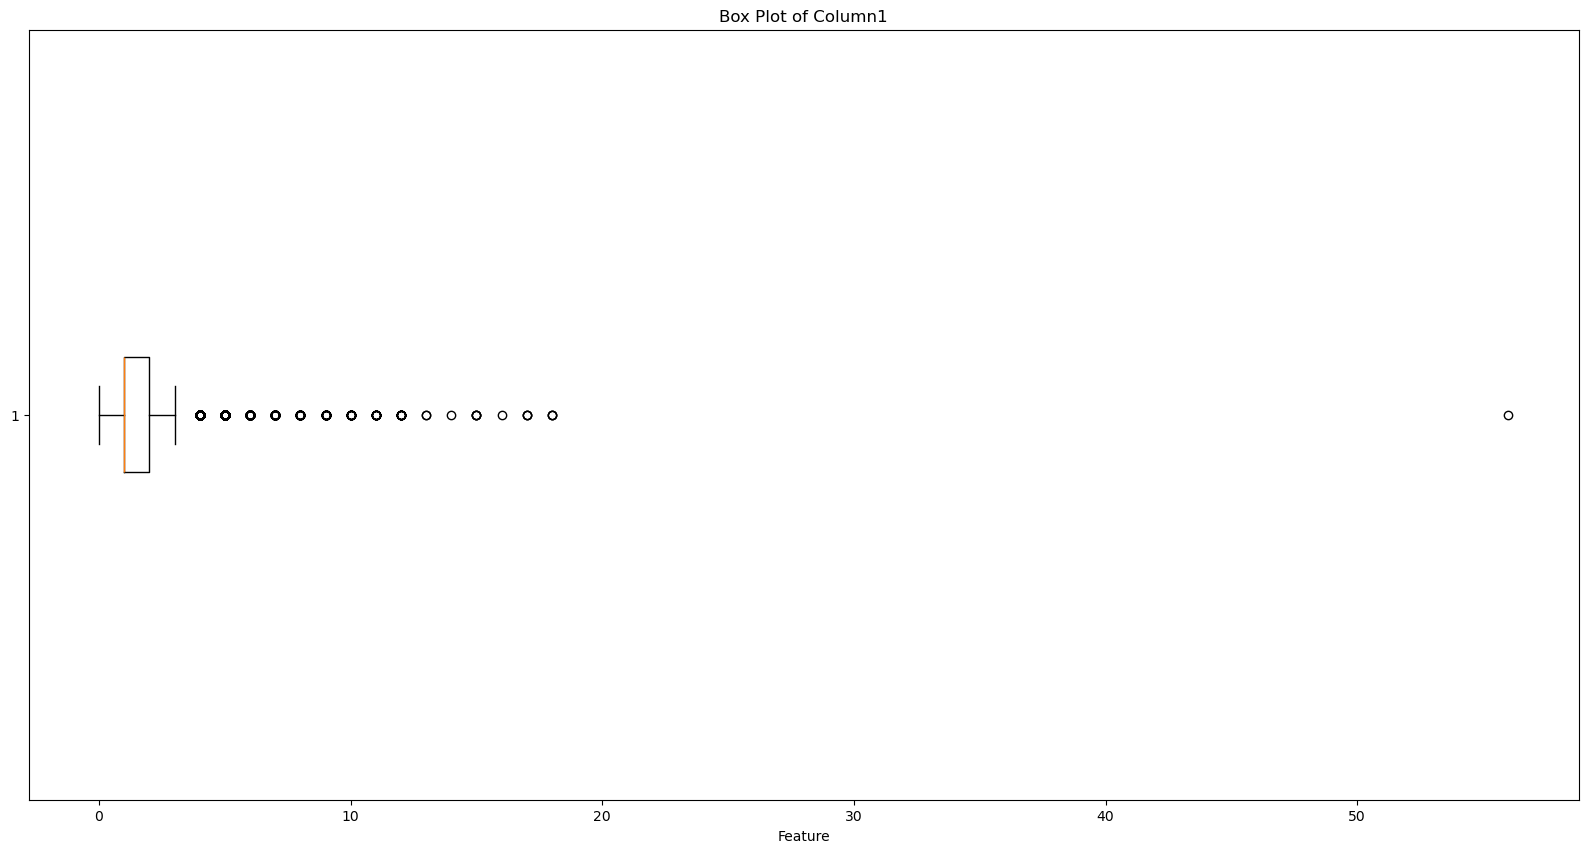

In [43]:
box_plot(cars_data['ex_owners'])

In [44]:
identify_outliers_iqr(cars_data['ex_owners'])

[-0.5, 3.5]

# Most cars have only one previous owner, while cars that have more than 5 are the minority

# Remove the outliers 

In [45]:
cars_data =  Remove_the_outliers(cars_data ,cars_data['ex_owners'] , 0 , 5 ) 

In [46]:
cars_data['ex_owners'].value_counts().sort_values()

5     207
4     342
0     656
3     697
2    1104
1    2878
Name: ex_owners, dtype: int64

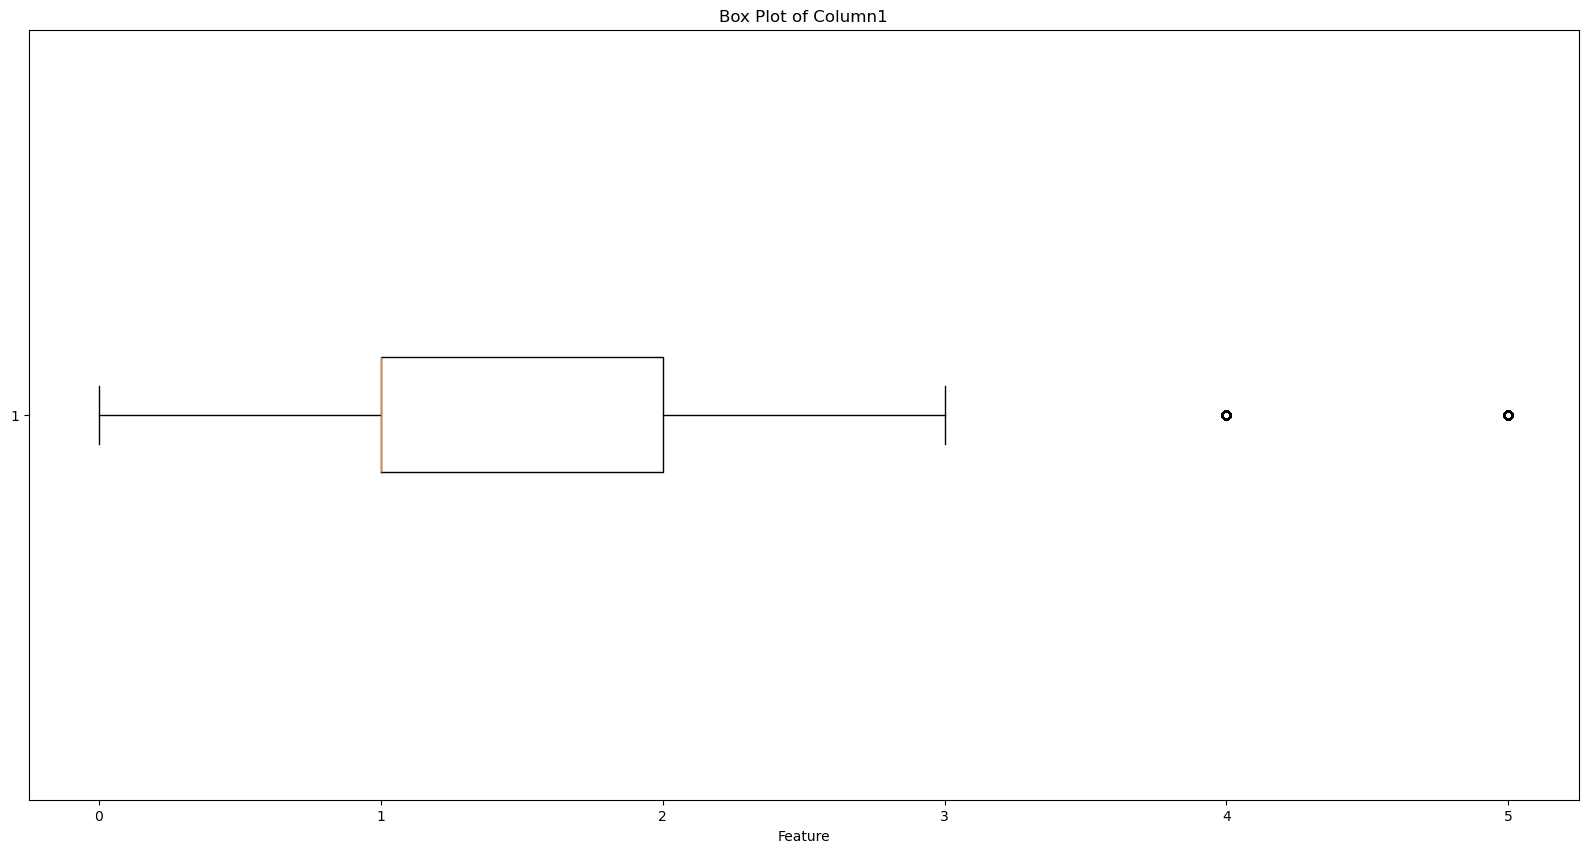

In [47]:
box_plot(cars_data['ex_owners'])

In [48]:
cars_data

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,1,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,2,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,1,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,0,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,1,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,2,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,1,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,0,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,0,6.0,0.0


# motor_power

In [49]:
cars_data['motor_power'].dtype

dtype('float64')

# motor power data type is float64

# Covert the data type to int 

In [50]:
cars_data['motor_power'] = cars_data['motor_power'].astype('int64')

# identifty the outliers 

In [51]:
identify_outliers_iqr(cars_data['motor_power'])

[500.0, 2900.0]

# the normal range for the 'قوة الماتور ' is between [500,2900] 

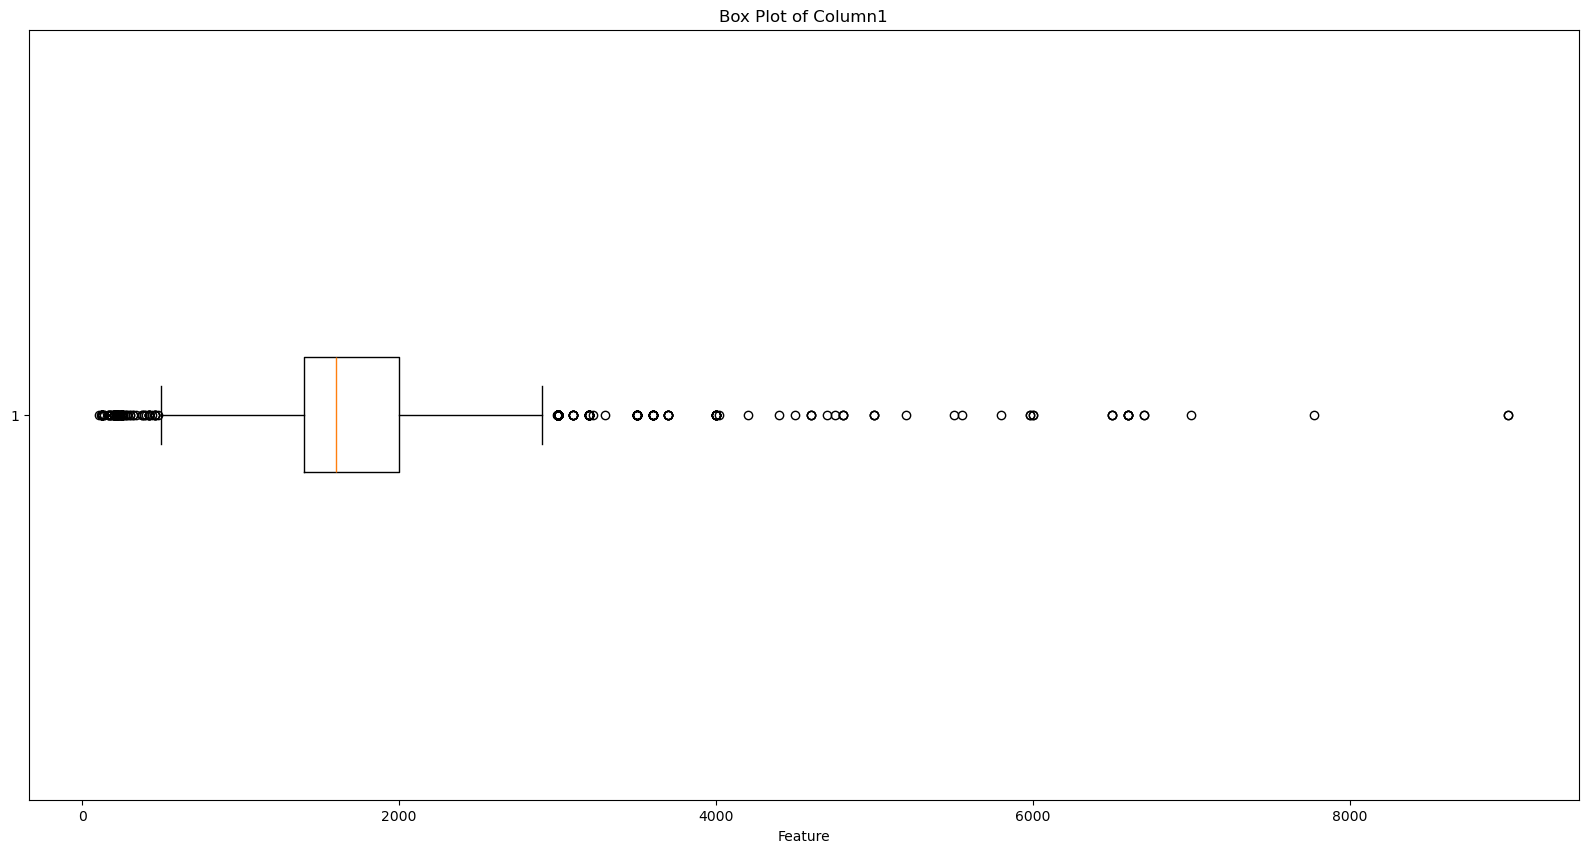

In [52]:
box_plot(cars_data['motor_power'])

# Remove the outliers from motor power

In [53]:
cars_data = Remove_the_outliers(cars_data ,cars_data['motor_power'], 500 , 3000 ) 

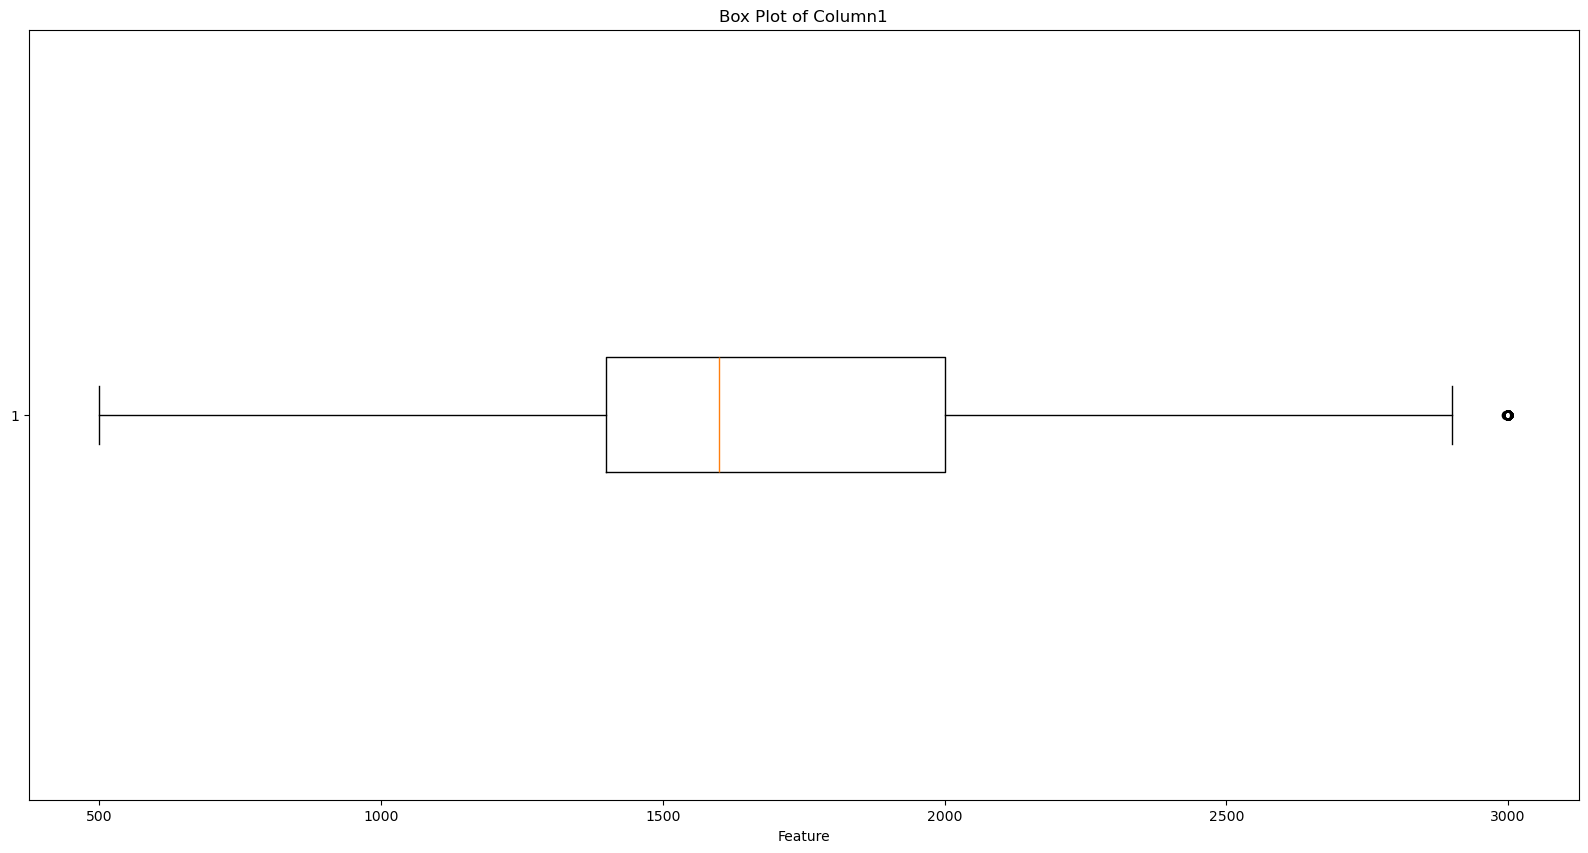

In [54]:
box_plot(cars_data['motor_power'])

In [55]:
cars_data

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,1,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,2,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,1,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,0,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,1,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000,4+1,2,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,4+1,1,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,25000,4+1,0,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,110,4+1,0,6.0,0.0


# car_speedometer

# There are numeric values, strings, and symbols in this feature

In [56]:
 cars_data['car_speedometer'].unique()

array(['75000', '130000', nan, ..., '7000000', '110.00', '60479'],
      dtype=object)

In [57]:
#Trying to standardize the data type 

#delete the strings 
pattern = r'[أ-يا]'
rows_with_letters = cars_data['car_speedometer'].str.contains(pattern, na=False, regex=True)
num_rows_with_letters_before_drop = cars_data[rows_with_letters].shape[0]
num_rows_with_letters_before_drop

197

In [58]:
cars_data = cars_data[~rows_with_letters]

In [59]:
cars_data['car_speedometer'].unique()

array(['75000', '130000', nan, '38000', '١٢٣٤٥٦', '50000', '460000',
       '45000', '70000', '79000', '000', '210000', '1', '20000',
       '00000000000000000', '113000', '33000', '122,000',
       '00000000000000', '22000', '150000', '29000', '123457', '٢٥٠٠٠٠',
       '140000', '122000', '78000', '00000', '900000', '7', '00000000',
       '65000', '190', '-', '184000', '200', '30000', '295000', '60000',
       '43000', '71', '160000', '121000', '9900', '56000', '٢٦٠', '0000',
       '200000', '60', '124000', '100000', '90000', '000000', '99',
       '82000', '32123123', '166000', '275000', '82700', '120000',
       '500000', '18000000', '١٥٠', '80000', '87000', '110000', '350000',
       '55', '٤٠٠٠٠٠', '35000', '380000', '167000', '140', '160',
       '123456789', '94000', '90', '82', '51', '115', '300000', '٤١٠٠٠',
       '120', '196000', '١٢٠٠٠٠', '2000', '٠٠٠٠٠', '136000', '116000',
       '132', '54000', '40', '72000', '12345', '133000', '157', '71000',
       '132000', '47000'

In [60]:
df_copy = cars_data.copy()

In [61]:
arabic_to_english = {
    '٠': '0',
    '١': '1',
    '٢': '2',
    '٣': '3',
    '٤': '4',
    '٥': '5',
    '٦': '6',
    '٧': '7',
    '٨': '8',
    '٩': '9'
}

def convert_arabic_to_english(arabic_number):
    if pd.notna(arabic_number):
        for arabic, english in arabic_to_english.items():
            arabic_number = arabic_number.replace(arabic, english)
        
        # Remove non-numeric characters
        arabic_number = re.sub(r'[^0-9]', '0' , arabic_number)
        print(arabic_number)

    return arabic_number



In [62]:
cars_data['car_speedometer'] = cars_data['car_speedometer'].apply(convert_arabic_to_english)


75000
130000
38000
123456
50000
460000
45000
70000
79000
000
210000
1
20000
00000000000000000
113000
33000
1220000
00000000000000
22000
150000
29000
123457
250000
140000
122000
78000
00000
22000
900000
7
00000000
65000
190
0
184000
200
30000
295000
60000
43000
71
160000
121000
9900
56000
260
00000
0000
200000
60
140000
124000
100000
90000
000000
99
200000
82000
32123123
000000
166000
275000
60000
00000
50000
82700
120000
500000
18000000
150
100000
60000
80000
20000
87000
30000
160000
110000
22000
350000
75000
55
400000
35000
380000
210000
167000
140
75000
160
123456789
60000
00000
94000
90
20000
80000
200
50000
140000
82
000
38000
51
120000
115
300000
41000
120
000000
196000
20000
43000
120000
2000
00000
136000
116000
132
54000
40
78000
72000
160000
12345
133000
157
71000
130000
132000
000
47000
999855
52000
5
30
250000
65000
165500
40000
140000
256664
109000
100
39000
190000
113500
74000
2000000
91000
150000
620
65000
51000
1600
1111111
100000
220
490000
460000
48000
159000
190
000000

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_1556\2773734295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['car_speedometer'] = cars_data['car_speedometer'].apply(convert_arabic_to_english)


In [63]:
cars_data['car_speedometer']  = pd.to_numeric(cars_data['car_speedometer'] , errors='coerce')

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_1556\2068111395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['car_speedometer']  = pd.to_numeric(cars_data['car_speedometer'] , errors='coerce')


In [64]:
cars_data['car_speedometer'].dtype

dtype('float64')

In [65]:
 cars_data['car_speedometer'].unique()

array([7.50000000e+04, 1.30000000e+05,            nan, 3.80000000e+04,
       1.23456000e+05, 5.00000000e+04, 4.60000000e+05, 4.50000000e+04,
       7.00000000e+04, 7.90000000e+04, 0.00000000e+00, 2.10000000e+05,
       1.00000000e+00, 2.00000000e+04, 1.13000000e+05, 3.30000000e+04,
       1.22000000e+06, 2.20000000e+04, 1.50000000e+05, 2.90000000e+04,
       1.23457000e+05, 2.50000000e+05, 1.40000000e+05, 1.22000000e+05,
       7.80000000e+04, 9.00000000e+05, 7.00000000e+00, 6.50000000e+04,
       1.90000000e+02, 1.84000000e+05, 2.00000000e+02, 3.00000000e+04,
       2.95000000e+05, 6.00000000e+04, 4.30000000e+04, 7.10000000e+01,
       1.60000000e+05, 1.21000000e+05, 9.90000000e+03, 5.60000000e+04,
       2.60000000e+02, 2.00000000e+05, 6.00000000e+01, 1.24000000e+05,
       1.00000000e+05, 9.00000000e+04, 9.90000000e+01, 8.20000000e+04,
       3.21231230e+07, 1.66000000e+05, 2.75000000e+05, 8.27000000e+04,
       1.20000000e+05, 5.00000000e+05, 1.80000000e+07, 1.50000000e+02,
      

In [66]:
cars_data['car_speedometer'].isna().sum()

1656

# there is a missing value in this feature . 

# Identify outliers 

In [67]:
lowest , highest = identify_outliers_iqr(cars_data['car_speedometer'])
print(lowest , highest)

-167000.0 308200.0


In [68]:
number_of_outliers = cars_data[(cars_data['car_speedometer']  < lowest) | (cars_data['car_speedometer'] > highest)]
len(number_of_outliers)

226

In [69]:
#test = cars_data.copy()

# Fill the missing  with median 

In [70]:
cars_data['car_speedometer'].fillna(cars_data['car_speedometer'].median(), inplace=True)

C:\Users\IMOE001\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [71]:
Q1 = cars_data['car_speedometer'].quantile(0.25)
Q3 = cars_data['car_speedometer'].quantile(0.85)
IQR = Q3 - Q1
lower_bound_in_speedometer = Q1 - 1.5 * IQR
upper_bound_in_speedometer = Q3 + 1.5 * IQR
lower_bound_in_speedometer , upper_bound_in_speedometer

(-125000.0, 315000.0)

In [72]:
cars_data = cars_data[(cars_data['car_speedometer'] > lower_bound_in_speedometer) & (cars_data['car_speedometer'] < upper_bound_in_speedometer ) ]

In [73]:
cars_data['car_speedometer'] .max()

308654.0

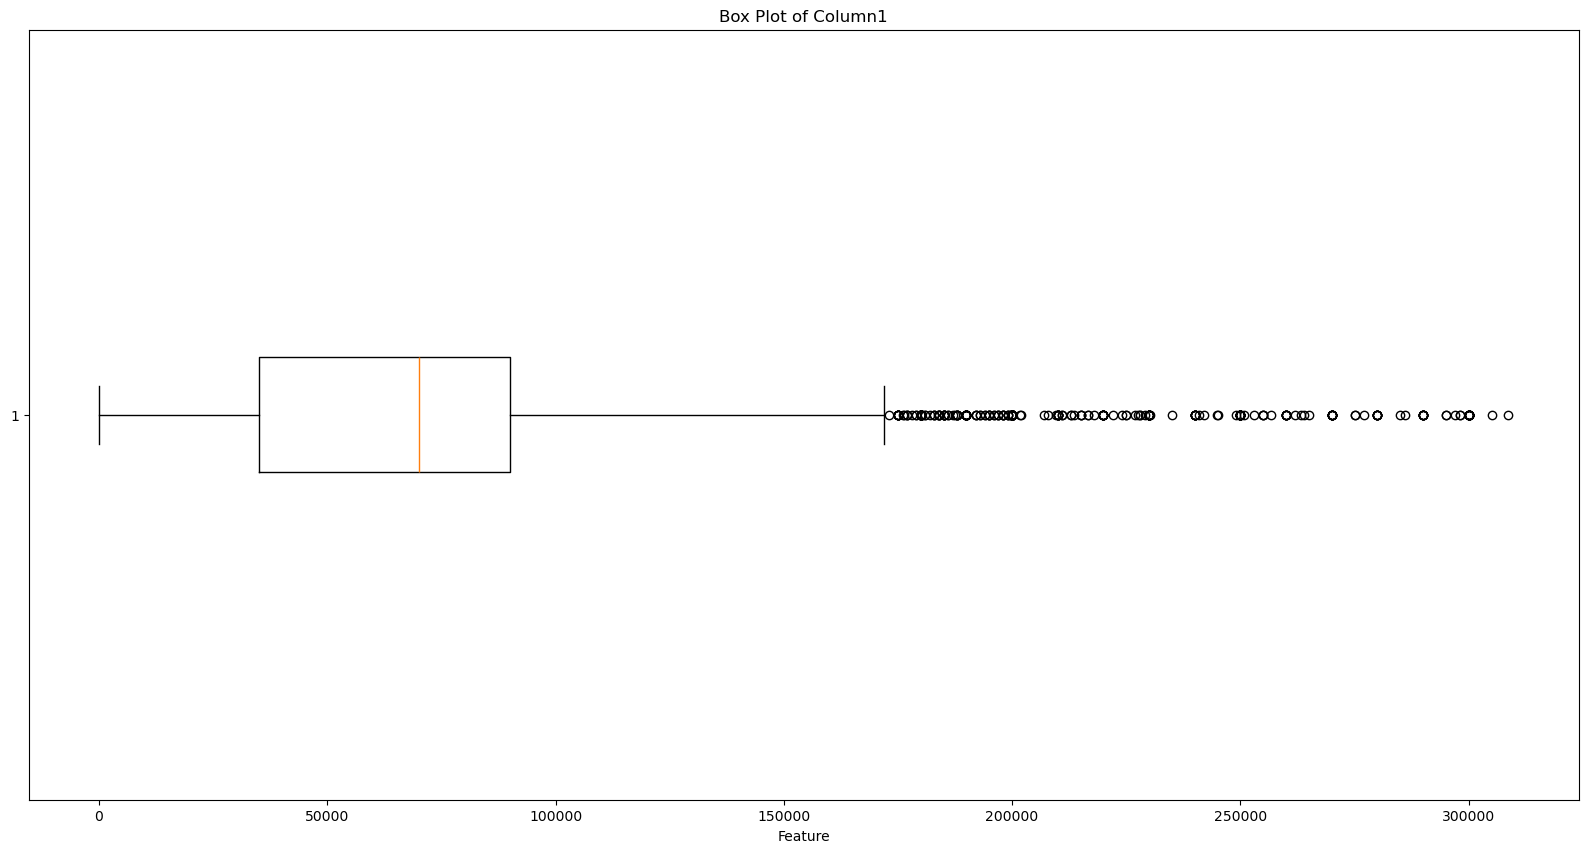

In [74]:
box_plot(cars_data['car_speedometer'])

In [75]:
cars_data.reset_index()

,index,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,4+1,1,7.0,1.0
1,3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,7+1,2,7.0,1.0
2,4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,NaN,1,7.0,0.0
3,7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,4+1,1,5.0,0.0
4,8,بي ام دبليو x3,موديل سنة 2015,205000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,70000.0,5+1,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,4+1,2,7.0,1.0
5245,6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,6.0,1.0
5246,6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,25000.0,4+1,0,7.0,0.0
5247,6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,110.0,4+1,0,6.0,0.0


In [76]:
df = cars_data.copy()

# Now the range of value in the car_speedometer is between [0,333000]

# price


# The data type is object

In [77]:
cars_data['Price'].dtype

dtype('O')

In [78]:
cars_data['Price'] = cars_data ['Price'].astype(str).str.replace('شيكل', '')



In [79]:
cars_data.rename(columns={'Price' : 'Price(NIS)'}, inplace=True)

In [80]:
cars_data['Price(NIS)'] .isna().sum()

0

# There is no missing value in the price 

In [81]:
cars_data['Price(NIS)'] = cars_data['Price(NIS)'].astype('int64')

In [82]:
cars_data['Price(NIS)'].dtype

dtype('int64')

# Identify the outliers in Price

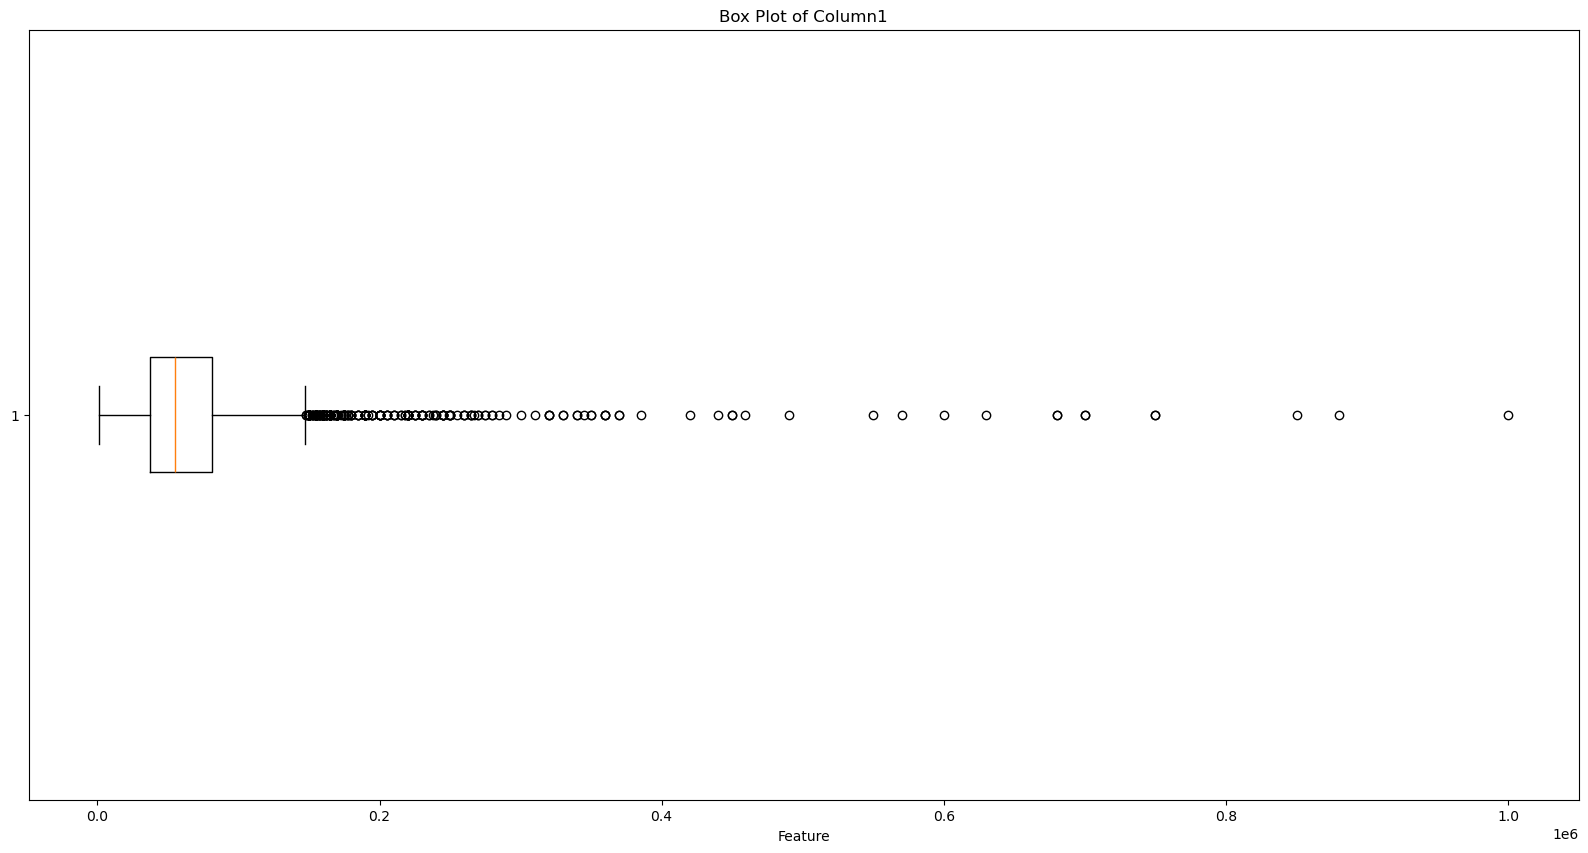

In [83]:
box_plot(cars_data['Price(NIS)'])

In [84]:
lower_bound, upper_bound   = identify_outliers_iqr(cars_data['Price(NIS)'])
lower_bound, upper_bound 

(-29000.0, 147000.0)

In [85]:
num_outliers = ((cars_data['Price(NIS)'] < lower_bound) | (cars_data['Price(NIS)'] > upper_bound)).sum()
print(f"Number of outliers in 'Price(NIS)': {num_outliers}")

Number of outliers in 'Price(NIS)': 255


In [86]:
 cars_data[cars_data['Price(NIS)'] < 5000][0:50]
#its fine with this prices , the price sutible with modle and speedometer . 

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
24,هوندا اكورد,موديل سنة 1997,2600,ذهبي,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,1800,210000.0,4+١,3,6.0,1.0
25,اوبل اسكونا,موديل سنة 1967,1800,أزرق,بنزين,خصوصي,فلسطينية,عادي,يدوي,1200,1.0,4+1,2,2.0,0.0
103,فولكسفاجن جولف,موديل سنة 1982,4000,خمري,بنزين,تأجير,فلسطينية,عادي,الكتروني,1300,70000.0,NaN,1,0.0,0.0
111,ستروين كسارا,موديل سنة 2000,1900,سكني,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,1600,0.0,5+1,1,6.0,0.0
275,بيجو 205,موديل سنة 1998,3500,أحمر,بنزين,خصوصي,نمرة صفراء,عادي,الكتروني,1400,70000.0,NaN,2,3.0,0.0
335,ميتسوبيشي كاريزما,موديل سنة 1999,1500,أبيض,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,1600,190.0,4+1,2,4.0,0.0
454,سوبارو نملة,موديل سنة 1982,3000,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,1600,0.0,4+1,5,1.0,0.0
480,فولكسفاجن جولف,موديل سنة 1998,3000,سكني,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,2000,0.0,4+1,0,7.0,1.0
516,فيات 127,موديل سنة 1980,3500,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,900,70000.0,NaN,1,2.0,0.0
590,رينو R9,موديل سنة 1983,4000,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,11111.0,١+٤,5,3.0,0.0


In [87]:
 cars_data[cars_data['Price(NIS)'] > upper_bound ][0:50]
#Unsuitable or unnatural prices. 

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
8,بي ام دبليو x3,موديل سنة 2015,205000,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,70000.0,5+1,0,7.0,1.0
10,مرسيدس C200,موديل سنة 2014,230000,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,50000.0,4+1,1,7.0,1.0
95,بي ام دبليو X3,موديل سنة 2014,215000,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,43000.0,4+1,1,7.0,1.0
141,مازدا 6,موديل سنة 2015,170000,خمري,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2500,50000.0,4+1,1,7.0,1.0
166,مرسيدس C250,موديل سنة 2015,175000,فيراني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2500,30000.0,NaN,0,7.0,1.0
202,فيات دوبلو,موديل سنة 2009,550000,بني,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1900,200.0,6±١,1,6.0,0.0
365,اودي A6,موديل سنة 2013,156000,أسود ميتالك,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,3000,70000.0,NaN,0,7.0,1.0
417,بي ام دبليو 528,موديل سنة 2014,215000,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,8000.0,4+1,1,7.0,0.0
419,كيا سورينتو,موديل سنة 2015,168000,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,70000.0,6+1,1,7.0,1.0
436,بي ام دبليو 520,موديل سنة 2014,190000,فيراني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,76000.0,4+1,1,7.0,1.0


# Remove the outliers 

In [88]:
cars_data = Remove_the_outliers(cars_data , cars_data['Price(NIS)'] , 0 , 155000.0 ) 

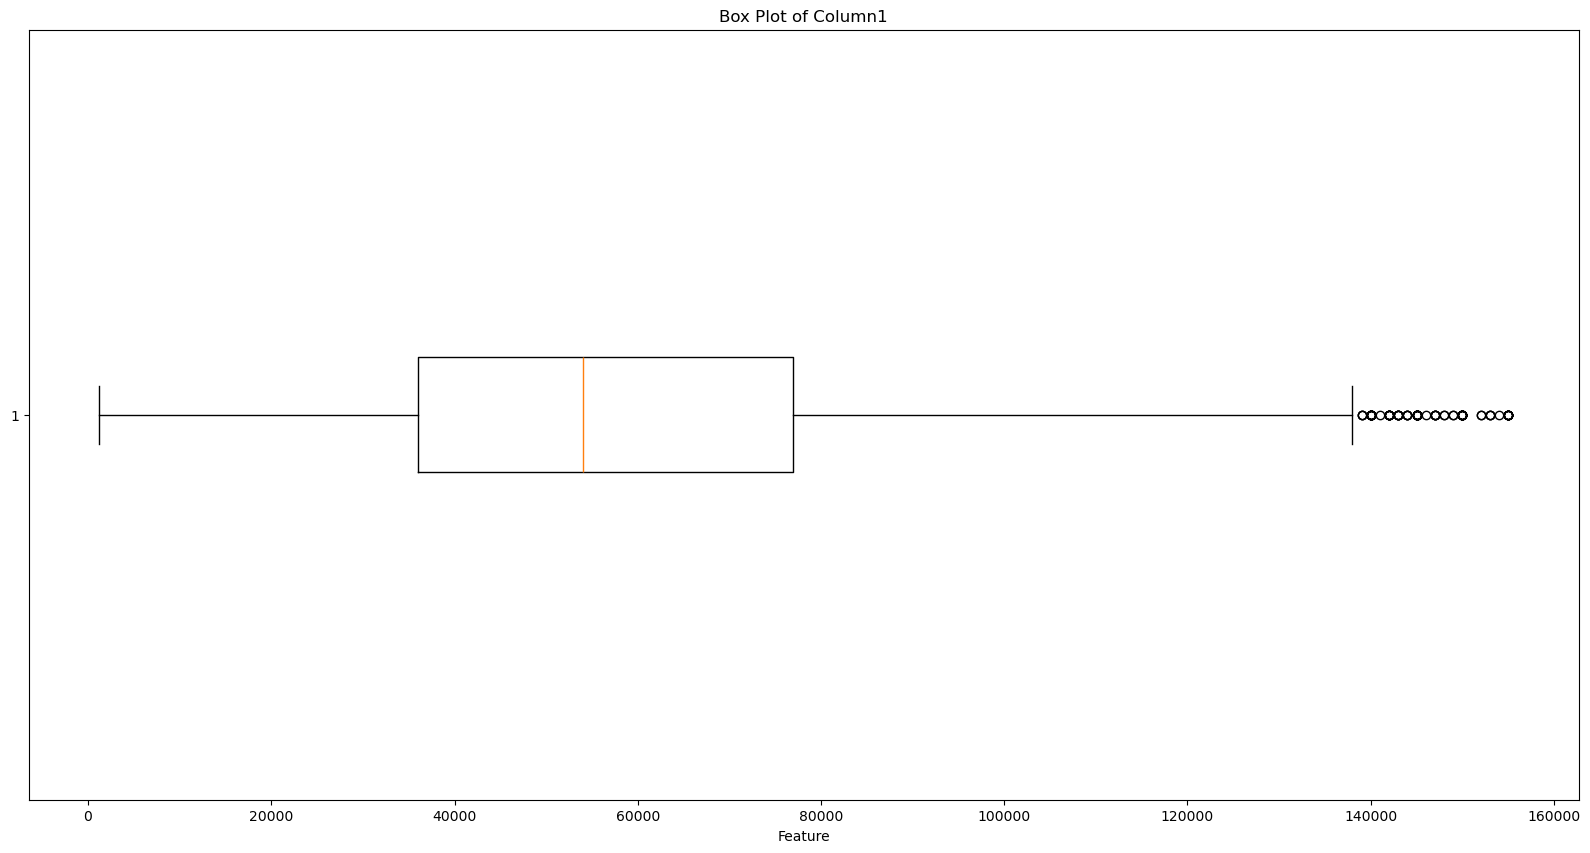

In [89]:
box_plot(cars_data['Price(NIS)'])

In [90]:
cars_data['Price(NIS)'].dtype

dtype('int64')

In [91]:
cars_data

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,4+1,1,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,7+1,2,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,NaN,1,7.0,0.0
7,بيجو 208,موديل سنة 2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,4+1,1,5.0,0.0
9,اوبل كورسا,موديل سنة 2015,65000,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,٤+١,1,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,موديل سنة 2021,115000,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,4+1,0,7.0,0.0
6982,فورد فيستا,موديل سنة 2012,30000,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,4+1,3,3.0,0.0
6983,مرسيدس C220,موديل سنة 2009,90000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,4+1,2,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,6.0,1.0


# Modle feature

In [92]:
cars_data['model'].dtype

dtype('O')

In [93]:
cars_data['model'].isna().sum()

0

# There is No missing data 

# Convert the data type 

In [94]:
cars_data['model'] = cars_data ['model'].astype(str).str.replace('موديل سنة', '')
cars_data['model'] = cars_data['model'].astype('int64')


In [95]:
cars_data['model'].dtype

dtype('int64')

In [96]:
missing_values_in_the_features = cars_data.isnull().sum()
missing_values_in_the_features

Name                     0
model                    0
Price(NIS)               0
color                    0
fuel_type                0
origin_car               0
car_license              0
lime_type                0
glass                    0
motor_power              0
car_speedometer          0
passengers             619
ex_owners                0
Number_of_Additions      0
sunroof                  0
dtype: int64

In [97]:
# Filling with most occurring Values
#cars_data = cars_data.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [98]:
cars_data['model'].value_counts().sort_values()

1972      1
1977      1
1968      1
1970      1
1967      1
1975      1
1974      1
1973      2
1978      2
1979      4
2021      5
1980      5
1991      6
1994      7
1981      7
1989     10
1993     10
1990     12
1992     21
1988     24
1995     25
1985     25
1984     27
1982     32
2020     36
1996     36
1987     37
1986     41
1983     50
1998     61
1997     68
2004     75
2001     75
2003     85
2019    104
2000    104
2002    105
1999    130
2005    130
2018    159
2009    166
2010    181
2017    217
2011    236
2006    245
2007    259
2013    269
2012    279
2008    372
2016    402
2015    425
2014    454
Name: model, dtype: int64

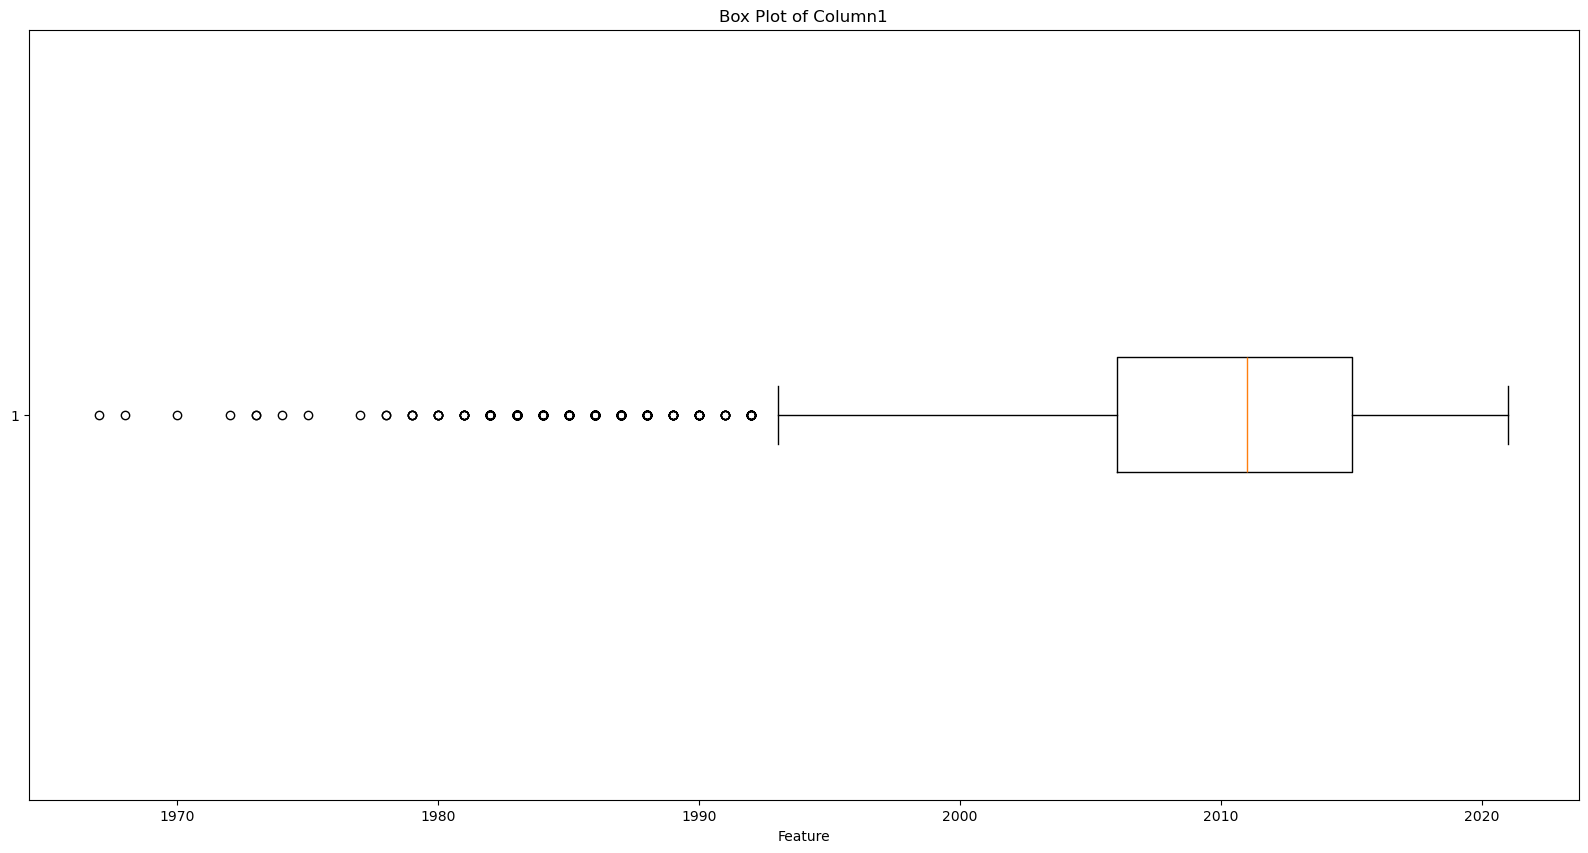

In [99]:
box_plot(cars_data['model'])

In [100]:
 cars_data[cars_data['model'] < 1995][0:50]
#this data can be consider normal data not outliers 

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
25,اوبل اسكونا,1967,1800,أزرق,بنزين,خصوصي,فلسطينية,عادي,يدوي,1200,1.0,4+1,2,2.0,0.0
40,اوبل كاديت,1982,17500,أبيض عاجي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1300,0.0,4+1,0,4.0,0.0
57,رينو R9,1983,11000,أبيض عاجي,بنزين,خصوصي,فلسطينية,عادي,يدوي,1100,70000.0,NaN,1,3.0,0.0
75,اوبل كاديت,1986,23000,أحمر,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1500,70000.0,4+1,1,4.0,0.0
79,اوبل كاديت,1984,13000,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,1400,184000.0,4+1,5,5.0,0.0
82,اوبل اسكونا,1984,6000,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,1300,200.0,5+1,5,2.0,0.0
103,فولكسفاجن جولف,1982,4000,خمري,بنزين,تأجير,فلسطينية,عادي,الكتروني,1300,70000.0,NaN,1,0.0,0.0
108,رينو R9,1983,7000,كحلي,بنزين,خصوصي,فلسطينية,عادي,يدوي,1100,70000.0,4+1,1,0.0,0.0
110,بيجو 305,1984,7500,أبيض عاجي,بنزين,خصوصي,فلسطينية,عادي,يدوي,1300,0.0,4+1,0,2.0,0.0
113,بي ام دبليو 520,1994,25000,كحلي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,2000,200000.0,4+1,5,7.0,1.0


# passengers Feature

In [101]:
cars_data['passengers'].dtype

dtype('O')

In [102]:
cars_data['passengers'].isna().sum()

619

# There is missing value in this feature 

In [103]:
cars_data['passengers'].unique()

array(['4+1', '7+1', nan, '٤+١', '4+١', '6+1', '٧', '7,+ 1', '5+1', '7:1',
       '1+7', '6+١', '+1', '22', '١+٤', '٥+١', '٧+1', '7.1', '7 =1',
       '٧+١', '6x1', '1+٤', '2+1', '2/1', '8+1', '٦+١', '2', '4+2',
       '4\\١', '3+1', '1', 'اكثر من 10', '9+1', '1+1'], dtype=object)

# mapping to standrize the format  

In [104]:
cars_data['passengers'].unique()
noisy_data_in_passengers = []

mapping_for_passengers  =  { 
  '٤+١' : '4+1' ,
  '4+١' : '4+1' , 
  '١+٤' : '4+1' , 
  '1+٤' : '4+1' , 
  '4\\١': '4+1', 
  '7,+ 1': '7+1',
  '7:1' : '7+1' ,
  '7.1' : '7+1' , 
  '٧+1' :  '7+1' , 
  '1+7' : '7+1' , 
  '7 =1': '7+1' , 
  '٧+١' :  '7+1',  
  '6+١' : '6+1' ,
  '6x1' : '6+1' , 
  '٦+١': '6+1' , 
  '٨+١' : '8+1' ,
  'nan' : 'NaN',
  '6±١': '6+1' , 
  '٥+١'  : '5+1' , 
  '4+2' : '5+1' ,
} 
cars_data['passengers'].unique()


array(['4+1', '7+1', nan, '٤+١', '4+١', '6+1', '٧', '7,+ 1', '5+1', '7:1',
       '1+7', '6+١', '+1', '22', '١+٤', '٥+١', '٧+1', '7.1', '7 =1',
       '٧+١', '6x1', '1+٤', '2+1', '2/1', '8+1', '٦+١', '2', '4+2',
       '4\\١', '3+1', '1', 'اكثر من 10', '9+1', '1+1'], dtype=object)

In [105]:
cars_data['passengers'] =  cars_data['passengers'].replace(mapping_for_passengers)

In [106]:
cars_data['passengers'].unique()

array(['4+1', '7+1', nan, '6+1', '٧', '5+1', '+1', '22', '2+1', '2/1',
       '8+1', '2', '3+1', '1', 'اكثر من 10', '9+1', '1+1'], dtype=object)

In [107]:
The_noisy_in_passengers = [ '4+2', '3+1', '1', 'اكثر من 10', '9+1', '1+1' , '٧' ,  '+1', '1+2', '2/1' , '2' , '22']

In [108]:
cars_data = cars_data[~cars_data['passengers'].isin(The_noisy_in_passengers)]

In [109]:
cars_data['passengers'].unique()

array(['4+1', '7+1', nan, '6+1', '5+1', '2+1', '8+1'], dtype=object)

In [110]:
cars_data['passengers'].value_counts().sort_values()

8+1      12
2+1      44
5+1      68
7+1     124
6+1     380
4+1    3702
Name: passengers, dtype: int64

In [111]:
df = cars_data.copy()


# Filling the missing data in passengers using Knn algorithem 

In [112]:
def impute_non_numeric(neighbors):
    # Extract the 'passengers' values from the neighbors
    passengers_values = neighbors['passengers'].dropna()
    print( 'Hello' , passengers_values)
    # Use mode to find the most common category
    if not passengers_values.empty:
        return mode(passengers_values)
#else all the neighbors , there passengers_values is missing .

   
numeric_features = df[['model', 'Price(NIS)', 'motor_power', 'car_speedometer']]
non_numeric_feature = 'passengers'

missing_indices = df[df[non_numeric_feature].isnull()].index
knn_model = NearestNeighbors(n_neighbors = 5)
knn_model.fit(numeric_features)

for index in missing_indices:
    print(index)
    features_to_impute = numeric_features.loc[index].values.reshape(1, -1)
    print(features_to_impute)
    distances, indices = knn_model.kneighbors(features_to_impute)
    print(distances, indices)
    neighbors = df.iloc[indices[0]]
    print(neighbors['passengers'])
    df.at[index, non_numeric_feature] = impute_non_numeric(neighbors)


4
[[ 2006. 43500.  1600. 70000.]]
[[  0.         350.09141663 500.         500.         500.        ]] [[   2 1543 1945  354 1093]]
4       NaN
2260    NaN
2832    4+1
548     4+1
1646    4+1
Name: passengers, dtype: object
Hello 2832    4+1
548     4+1
1646    4+1
Name: passengers, dtype: object
12
[[ 2014. 59000.  1600. 70000.]]
[[  0.           2.         200.         200.02249873 400.00125   ]] [[   5 1687  159 3434 3681]]
12      NaN
2471    4+1
260     NaN
4836    4+1
5195    4+1
Name: passengers, dtype: object
Hello 2471    4+1
4836    4+1
5195    4+1
Name: passengers, dtype: object
19
[[ 2012. 55000.  1200. 70000.]]
[[0. 2. 4. 4. 5.]] [[   9 1418 2832 4925 4665]]
19      NaN
2083    4+1
4004    4+1
6953    4+1
6577    4+1
Name: passengers, dtype: object
Hello 2083    4+1
4004    4+1
6953    4+1
6577    4+1
Name: passengers, dtype: object
22
[[ 2011. 55000.  1600.     0.]]
[[ 0.  1.  3.  3. 10.]] [[  11 1732 2740 4204 4310]]
22      NaN
2534    4+1
3886    4+1
5951    4+1
6089  

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[   0.         1428.30283904 2315.18487383 3006.65994086 3627.67818308]] [[ 152 4840 4461   16 1910]]
243     NaN
6836    4+1
6293    4+1
30      4+1
2788    4+1
Name: passengers, dtype: object
Hello 6836    4+1
6293    4+1
30      4+1
2788    4+1
Name: passengers, dtype: object
251
[[ 2006. 60000.  2000. 70000.]]
[[0. 0. 1. 1. 1.]] [[ 156  188 2493 2586 1951]]
251     NaN
299     4+1
3546    7+1
3680    6+1
2840    4+1
Name: passengers, dtype: object
Hello 299     4+1
3546    7+1
3680    6+1
2840    4+1
Name: passengers, dtype: object
260
[[ 2014. 59000.  1400. 70000.]]
[[  0.           3.         200.         200.00249998 200.00999975]] [[ 159 3434    5 3681 1687]]
260     NaN
4836    4+1
12      4+1
5195    4+1
2471    4+1
Name: passengers, dtype: object
Hello 4836    4+1
12      4+1
5195    4+1
2471    4+1
Name: passengers, dtype: object
264
[[  2011.  56500.   1600. 133000.]]
[[   0.         2501.99940048 3041.38142955 3067.57493796 3360.06086254]] [[ 163 1875 2537 2038 4709]]
26

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

558     NaN
1281    NaN
1675    4+1
2713    4+1
1776    4+1
Name: passengers, dtype: object
Hello 1675    4+1
2713    4+1
1776    4+1
Name: passengers, dtype: object
562
[[ 2001. 13500.  2500. 70000.]]
[[  0.         583.37295104 707.31110553 781.18883761 860.2610069 ]] [[ 363 3667 4282 2440 4879]]
562     NaN
5174    4+1
6055    4+1
3477    7+1
6893    4+1
Name: passengers, dtype: object
Hello 5174    4+1
6055    4+1
3477    7+1
6893    4+1
Name: passengers, dtype: object
564
[[ 2014. 63000.  1600. 57000.]]
[[   0.         2009.97611926 2271.56421877 2271.56531933 2289.90873181]] [[ 364 3051 3953 2749 4301]]
564     NaN
4295    4+1
5590    4+1
3895    NaN
6079    4+1
Name: passengers, dtype: object
Hello 4295    4+1
5590    4+1
6079    4+1
Name: passengers, dtype: object
580
[[ 2014. 94500.  2000. 70000.]]
[[  0.         500.001      500.00399998 500.00399998 500.00899992]] [[ 375  499 4821 3424 2355]]
580     NaN
792     5+1
6804    NaN
4824    6+1
3368    4+1
Name: passengers, dtype

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.         200.         200.00999975 500.02499938 509.90293194]] [[ 551 1309  367 2561 1433]]
873     NaN
1937    4+1
569     4+1
3645    4+1
2108    4+1
Name: passengers, dtype: object
Hello 1937    4+1
569     4+1
3645    4+1
2108    4+1
Name: passengers, dtype: object
917
[[ 2010. 50000.  1600. 70000.]]
[[0. 0. 1. 2. 2.]] [[ 576 1227 3171 1338 2522]]
917     NaN
1831    6+1
4458    4+1
1979    5+1
3588    4+1
Name: passengers, dtype: object
Hello 1831    6+1
4458    4+1
1979    5+1
3588    4+1
Name: passengers, dtype: object
924
[[ 1987. 18000.  1600. 68515.]]
[[   0.        1485.        1485.0003367 1485.0013468 1485.0013468]] [[ 581  795 3023 1899  401]]
924     NaN
1237    4+1
4262    4+1
2772    4+1
623     4+1
Name: passengers, dtype: object
Hello 1237    4+1
4262    4+1
2772    4+1
623     4+1
Name: passengers, dtype: object
925
[[ 2003. 42000.  1900. 70000.]]
[[  0.           2.           2.          50.35871325 100.00499988]] [[ 582 4680 1163  520  190]]
925     NaN
6598

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.           0.           0.           2.         200.04249549]] [[ 937  254 1768 3226 2830]]
1438    NaN
403     4+1
2585    4+1
4532    4+1
4002    4+1
Name: passengers, dtype: object
Hello 403     4+1
2585    4+1
4532    4+1
4002    4+1
Name: passengers, dtype: object
1440
[[ 2009. 78000.  1900. 70000.]]
[[   0.          300.10664771  500.          800.0025     1005.        ]] [[ 938 3359 1022 3066 4021]]
1440    NaN
4724    NaN
1551    6+1
4315    6+1
5677    4+1
Name: passengers, dtype: object
Hello 1551    6+1
4315    6+1
5677    4+1
Name: passengers, dtype: object
1455
[[  2007.  47000.   1400. 200000.]]
[[   0.         1019.8161599  1264.91304049 2000.01224996 2006.61829953]] [[ 949 2814 1388  379  702]]
1455    NaN
3978    4+1
2039    4+1
585     4+1
1104    4+1
Name: passengers, dtype: object
Hello 3978    4+1
2039    4+1
585     4+1
1104    4+1
Name: passengers, dtype: object
1463
[[ 2007. 34000.  1600. 70000.]]
[[0. 0. 1. 1. 1.]] [[2900  957 1558  668 2658]]
4082    4+1

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.          78.23042886 201.         205.00243901 223.60903381]] [[1229  873 2275  578 4694]]
1833    NaN
1340    4+1
3263    4+1
921     5+1
6618    4+1
Name: passengers, dtype: object
Hello 1340    4+1
3263    4+1
921     5+1
6618    4+1
Name: passengers, dtype: object
1846
[[ 1981.  7000.  1600. 70000.]]
[[ 0.  2.  5.  5. 30.]] [[1239 2165 1115 1154 2354]]
1846    NaN
3124    NaN
1676    4+1
1725    4+1
3365    4+1
Name: passengers, dtype: object
Hello 1676    4+1
1725    4+1
3365    4+1
Name: passengers, dtype: object
1851
[[ 2007. 33000.  1400. 70000.]]
[[0. 0. 1. 1. 2.]] [[1243 2306 2103 1790 3118]]
1851    NaN
3303    4+1
3042    4+1
2612    4+1
4391    4+1
Name: passengers, dtype: object
Hello 3303    4+1
3042    4+1
2612    4+1
4391    4+1
Name: passengers, dtype: object
1876
[[ 1986. 42000.  2000. 70000.]]
[[  0.          14.          16.          55.03635162 101.43470806]] [[1259 3702  190  520  582]]
1876    NaN
5223    4+1
301     4+1
826     6+1
925     4+1
Name: pass

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[ 0. 12. 12. 13. 13.]] [[1649   33  538 2500 2758]]
2419    NaN
52      4+1
853     4+1
3555    NaN
3905    4+1
Name: passengers, dtype: object
Hello 52      4+1
853     4+1
3905    4+1
Name: passengers, dtype: object
2437
[[ 2005. 32000.  2000. 70000.]]
[[  0.           1.         100.00499988 100.019998   200.02249873]] [[1662 3513 3832 2539 3539]]
2437    NaN
4956    4+1
5420    NaN
3612    6+1
4999    6+1
Name: passengers, dtype: object
Hello 4956    4+1
3612    6+1
4999    6+1
Name: passengers, dtype: object
2447
[[ 2011. 32000.  1000. 70000.]]
[[  0.         250.01799935 400.         400.01124984 400.0199995 ]] [[1669 4846 2234 3573 2232]]
2447    NaN
6844    4+1
3214    4+1
5046    4+1
3212    4+1
Name: passengers, dtype: object
Hello 6844    4+1
3214    4+1
5046    4+1
3212    4+1
Name: passengers, dtype: object
2451
[[ 2015. 90000.  1600. 71000.]]
[[   0.         1000.0005     1000.0005     1000.00799997 1019.80439301]] [[1671   21 2914 1879 3151]]
2451    NaN
36      4+1
410

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.          37.          40.31128874  85.00588215 201.96039216]] [[2088  371 3448 2804 3798]]
3019    NaN
574     4+1
4854    4+1
3962    4+1
5375    4+1
Name: passengers, dtype: object
Hello 574     4+1
4854    4+1
3962    4+1
5375    4+1
Name: passengers, dtype: object
3025
[[ 2009. 45000.  1800. 70000.]]
[[  0.           2.         100.019998   100.04498988 100.07996803]] [[2093 1311 1073 3306 1501]]
3025    NaN
1939    4+1
1618    4+1
4646    NaN
2204    4+1
Name: passengers, dtype: object
Hello 1939    4+1
1618    4+1
2204    4+1
Name: passengers, dtype: object
3036
[[ 2007. 42000.  1800.     0.]]
[[  0.         200.06249024 200.12246251 200.12246251 301.00166112]] [[2100 3976 4206 1015  505]]
3036    NaN
5620    4+1
5953    4+1
1544    4+1
804     4+1
Name: passengers, dtype: object
Hello 5620    4+1
5953    4+1
1544    4+1
804     4+1
Name: passengers, dtype: object
3052
[[ 2014. 65000.  1200. 70000.]]
[[  0.           2.         191.06543382 200.00249998 200.00249998]] [[21

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

3545    NaN
214     4+1
4041    4+1
6615    4+1
2871    4+1
Name: passengers, dtype: object
Hello 214     4+1
4041    4+1
6615    4+1
2871    4+1
Name: passengers, dtype: object
3555
[[ 2011. 85000.  2000. 70000.]]
[[0. 0. 1. 1. 1.]] [[2758 2500  538   33  492]]
3905    4+1
3555    NaN
853     4+1
52      4+1
776     4+1
Name: passengers, dtype: object
Hello 3905    4+1
853     4+1
52      4+1
776     4+1
Name: passengers, dtype: object
3560
[[ 2012. 34000.  1400. 70000.]]
[[  0.           5.           6.         200.00999975 200.039996  ]] [[2503 3559 1471 1943 1558]]
3560    NaN
5024    NaN
2155    4+1
2828    4+1
2285    4+1
Name: passengers, dtype: object
Hello 2155    4+1
2828    4+1
2285    4+1
Name: passengers, dtype: object
3592
[[  2017. 143999.   2000.  69000.]]
[[   0.          999.0005005  1000.001      1414.92119922 1414.92119922]] [[2525 4382 4438 4732 2894]]
3592    NaN
6184    4+1
6265    6+1
6668    8+1
4076    4+1
Name: passengers, dtype: object
Hello 6184    4+1
6265

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[   0.          4.        400.079992 2000.00025  2000.00025 ]] [[2842 2591 1455 4701 4746]]
4018    NaN
3685    6+1
2134    6+1
6628    4+1
6691    NaN
Name: passengers, dtype: object
Hello 3685    6+1
2134    6+1
6628    4+1
Name: passengers, dtype: object
4023
[[ 2017. 54000.  1000. 70000.]]
[[  0.         200.00249998 400.         600.02083297 781.03521047]] [[2847 2720 4193 3088 3581]]
4023    NaN
3860    4+1
5932    4+1
4344    4+1
5055    NaN
Name: passengers, dtype: object
Hello 3860    4+1
5932    4+1
4344    4+1
Name: passengers, dtype: object
4027
[[  2001.  20000.    800. 130000.]]
[[   0.         2088.09578324 3059.41236188 6668.13317204 6889.40759427]] [[2851 4028 3354 1860 3108]]
4027    NaN
5689    4+1
4718    4+1
2719    4+1
4374    4+1
Name: passengers, dtype: object
Hello 5689    4+1
4718    4+1
2719    4+1
4374    4+1
Name: passengers, dtype: object
4047
[[ 1995. 20000.  1800. 70000.]]
[[  0.         100.07996803 100.31948963 200.00249998 200.00999975]] [[2870 1725 

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[0. 0. 1. 1. 2.]] [[1834 3316 2840 1585  149]]
2677    4+1
4659    NaN
4014    4+1
2321    4+1
239     4+1
Name: passengers, dtype: object
Hello 2677    4+1
4014    4+1
2321    4+1
239     4+1
Name: passengers, dtype: object
4679
[[ 2017. 58000.  1200. 50000.]]
[[   0.          900.00222222 1077.04456732 1414.21497659 1469.69418588]] [[3331 2330 1454 1694 3049]]
4679    NaN
3335    4+1
2132    4+1
2481    4+1
4293    4+1
Name: passengers, dtype: object
Hello 3335    4+1
2132    4+1
2481    4+1
4293    4+1
Name: passengers, dtype: object
4703
[[ 2007. 35500.  1400. 70000.]]
[[  0.           2.           3.         200.15993605 360.57731487]] [[3348 1946 2046  383 4268]]
4703    NaN
2834    4+1
2964    4+1
595     4+1
6036    NaN
Name: passengers, dtype: object
Hello 2834    4+1
2964    4+1
595     4+1
Name: passengers, dtype: object
4711
[[ 2014. 51000.  1400. 70000.]]
[[   0.          500.          900.00055556 1000.         1000.        ]] [[3351 2700   40  486 4403]]
4711    NaN
382

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[   0.         3001.67036831 5015.97458128 5844.65576403 5844.65602067]] [[3652 4800 2424  706 2381]]
5152    NaN
6773    NaN
3458    4+1
1108    4+1
3401    4+1
Name: passengers, dtype: object
Hello 3458    4+1
1108    4+1
3401    4+1
Name: passengers, dtype: object
5172
[[ 2018. 76000.  1600. 70000.]]
[[   0.          200.00499994  200.12246251 1000.         1000.002     ]] [[3665 4465 1107 4146 1226]]
5172    NaN
6298    4+1
1667    4+1
5865    4+1
1830    4+1
Name: passengers, dtype: object
Hello 6298    4+1
1667    4+1
5865    4+1
1830    4+1
Name: passengers, dtype: object
5194
[[  1968.  40000.   1300. 286000.]]
[[    0.          6021.75398036  6081.8849874   8151.14445952
  11677.37230716]] [[3680 3991  225 3764 2908]]
5194    NaN
5640    4+1
357     4+1
5327    4+1
4091    4+1
Name: passengers, dtype: object
Hello 5640    4+1
357     4+1
5327    4+1
4091    4+1
Name: passengers, dtype: object
5215
[[ 2014. 43000.  1200. 70000.]]
[[  0.           2.          50.009999    50.00

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.         200.72119968 301.12455895 400.01124984 403.14389491]] [[3994 4127   61  904 1031]]
5643     NaN
5831     NaN
103      4+1
1390    None
1565     4+1
Name: passengers, dtype: object
Hello 103     4+1
1565    4+1
Name: passengers, dtype: object
5650
[[  2008. 100000.   1900.  70000.]]
[[  0.         100.04498988 100.31948963 100.32447358 300.00666659]] [[3999  860 4114 1992 2623]]
5650    NaN
1322    4+1
5814    6+1
2894    6+1
3725    6+1
Name: passengers, dtype: object
Hello 1322    4+1
5814    6+1
2894    6+1
3725    6+1
Name: passengers, dtype: object
5661
[[  2016. 118000.   2000.  54000.]]
[[   0.         2271.56355843 3047.95160723 4000.000125   4044.75079578]] [[4010 2874 1369 2975 4153]]
5661    NaN
4051    4+1
2014    6+1
4189    6+1
5877    4+1
Name: passengers, dtype: object
Hello 4051    4+1
2014    6+1
4189    6+1
5877    4+1
Name: passengers, dtype: object
5668
[[  2015.  50000.   1300. 140000.]]
[[   0.          100.00499988  510.02058782 3001.67036831 3014.

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[0. 0. 1. 1. 1.]] [[4397 1164  661 1065 1681]]
6201    NaN
1740    4+1
1048    4+1
1606    4+1
2463    4+1
Name: passengers, dtype: object
Hello 1740    4+1
1048    4+1
1606    4+1
2463    4+1
Name: passengers, dtype: object
6222
[[ 2018. 12345.  1700. 74000.]]
[[   0.         1261.05114884 1564.70859907 2671.90213144 4016.17990135]] [[4413 2766 1064 4588 3037]]
6222    NaN
3915    4+1
1605    4+1
6470    5+1
4279    4+1
Name: passengers, dtype: object
Hello 3915    4+1
1605    4+1
6470    5+1
4279    4+1
Name: passengers, dtype: object
6225
[[ 1987. 23000.  2300. 70000.]]
[[  0.         200.02249873 200.48940122 400.24492501 400.28115119]] [[4416 1730 2627 4312 4862]]
6225    NaN
2531    7+1
3732    7+1
6092    4+1
6871    4+1
Name: passengers, dtype: object
Hello 2531    7+1
3732    7+1
6092    4+1
6871    4+1
Name: passengers, dtype: object
6242
[[ 2014. 56000.  1400.    58.]]
[[  0.          21.         102.00490184 400.62451248 501.2245006 ]] [[4425 1336  115 4686 2406]]
6242    

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.         500.36086977 500.52872045 510.15291825 510.18526047]] [[4678 1816  651 4139  506]]
6594    NaN
2652    4+1
1033    4+1
5857    4+1
805     5+1
Name: passengers, dtype: object
Hello 2652    4+1
1033    4+1
5857    4+1
805     5+1
Name: passengers, dtype: object
6598
[[ 2005. 42000.  1900. 70000.]]
[[  0.           0.           2.          50.15974482 100.04498988]] [[4680 1163  582  520  190]]
6598    NaN
1739    4+1
925     4+1
826     6+1
301     4+1
Name: passengers, dtype: object
Hello 1739    4+1
925     4+1
826     6+1
301     4+1
Name: passengers, dtype: object
6632
[[  2014. 130000.   2000.  70000.]]
[[0. 1. 2. 2. 4.]] [[4703 1134 1348 4240 4109]]
6632    NaN
1701    4+1
1990    4+1
5997    4+1
5808    4+1
Name: passengers, dtype: object
Hello 1701    4+1
1990    4+1
5997    4+1
5808    4+1
Name: passengers, dtype: object
6633
[[ 2002. 19000.  1500. 70000.]]
[[  0.         100.00499988 100.04498988 100.08496391 100.60318086]] [[4704 3123 2755 3661 4083]]
6633    N

[[   0.         1498.11414785 3020.34782765 3168.59842833 3219.62761822]] [[4941  542 3412 1577 3521]]
6977    NaN
858     4+1
4806    4+1
2312    4+1
4967    4+1
Name: passengers, dtype: object
Hello 858     4+1
4806    4+1
2312    4+1
4967    4+1
Name: passengers, dtype: object


C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

In [113]:
# when k = 1 => 594
# k => 2 =>110
#k => 3 => 28
#k => 5 =>3

In [114]:
df['passengers'].isna().sum()

3

In [117]:
cars_data['passengers'] = df['passengers']

In [118]:
cars_data= cars_data.dropna(subset=['passengers'])


In [119]:
cars_data['passengers'].isna().sum()

0

In [120]:
len(cars_data['passengers'] )

4946

In [121]:
cars_data.reset_index()

,index,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,4+1,1,7.0,1.0
1,3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,7+1,2,7.0,1.0
2,4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,7.0,0.0
3,7,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,4+1,1,5.0,0.0
4,9,اوبل كورسا,2015,65000,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,4+1,1,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,6981,سيت ارونا,2021,115000,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,4+1,0,7.0,0.0
4942,6982,فورد فيستا,2012,30000,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,4+1,3,3.0,0.0
4943,6983,مرسيدس C220,2009,90000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,4+1,2,7.0,1.0
4944,6984,نيسان كشكاي,2014,95000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,6.0,1.0


In [122]:

def pie_plot(The_feature):
    feature_counts = The_feature.value_counts()
    colors = plt.cm.Paired(range(len(feature_counts)))
    plt.figure(figsize=(20, 10))
    patches, texts, autotexts = plt.pie(feature_counts, labels=feature_counts.index, autopct='',
                                       startangle=140, colors=colors)
    for text, autotext, color in zip(texts, autotexts, colors):
        text.set_color(color)
        autotext.set_color(color)

    plt.title('Pie Chart for Feature')
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.size'] = 10

    plt.show()


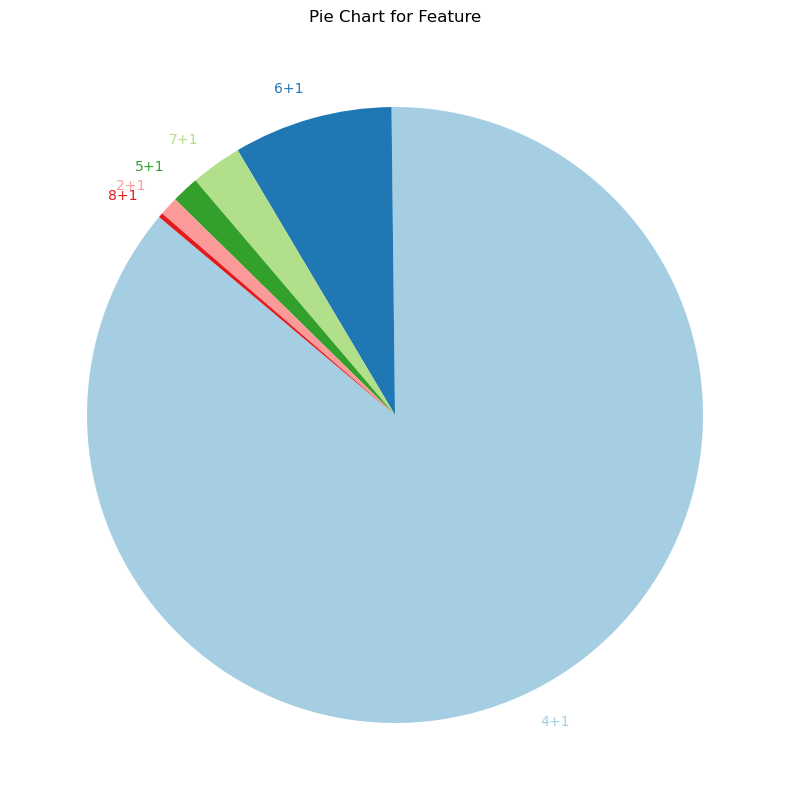

In [123]:
pie_plot(cars_data['passengers'])

# convert the passengers to int  

In [124]:
cars_data['passengers'].dtype

dtype('O')

In [125]:
cars_data['passengers'].isna().sum()

0

In [126]:
def convert_to_numeric(value):
    if isinstance(value, str):
        parts = value.split('+')
        if len(parts) == 2:
            return int(parts[0]) + int(parts[1])
    return value  # Return the original value for non-string or invalid formats

cars_data['passengers'] = cars_data['passengers'].apply(convert_to_numeric)


In [127]:
cars_data['passengers'].unique()

array([5, 8, 7, 6, 3, 9], dtype=int64)

In [128]:
cars_data['passengers'] = cars_data['passengers'].astype('int64')

In [129]:
missing_values_in_the_features = cars_data.isnull().sum()
missing_values_in_the_features

Name                   0
model                  0
Price(NIS)             0
color                  0
fuel_type              0
origin_car             0
car_license            0
lime_type              0
glass                  0
motor_power            0
car_speedometer        0
passengers             0
ex_owners              0
Number_of_Additions    0
sunroof                0
dtype: int64

In [130]:
cars_data['Number_of_Additions'] = cars_data['Number_of_Additions'].astype('int64')

# Now all features (numeric Features) having no missing values OR outliers 

In [131]:
cars_data.reset_index()

,index,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5,1,7,1.0
1,3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8,2,7,1.0
2,4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5,1,7,0.0
3,7,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5,1,5,0.0
4,9,اوبل كورسا,2015,65000,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,5,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,6981,سيت ارونا,2021,115000,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,5,0,7,0.0
4942,6982,فورد فيستا,2012,30000,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,5,3,3,0.0
4943,6983,مرسيدس C220,2009,90000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,5,2,7,1.0
4944,6984,نيسان كشكاي,2014,95000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5,1,6,1.0


# Try to normalize and Handle Skewed Distributions

In [132]:
cars_data.kurt()

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_1556\112665499.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars_data.kurt()


model                  2.178241
Price(NIS)             0.136740
motor_power            1.085897
car_speedometer        1.798326
passengers             5.342821
ex_owners              0.666714
Number_of_Additions    0.850195
sunroof               -0.439008
dtype: float64

In [133]:
cars_data.skew()



C:\Users\IMOE001\AppData\Local\Temp\ipykernel_1556\3884956662.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars_data.skew()


model                 -1.452954
Price(NIS)             0.727353
motor_power            0.776713
car_speedometer        1.151744
passengers             2.147018
ex_owners              1.065441
Number_of_Additions   -1.310244
sunroof                1.249468
dtype: float64

# Normlaize model  : -1.452954  ,  passengers :  2.147018 , Price(NIS) : 0.727353 

# Most of Our data is positively skewed => right tail of the distribution 


# But execpt modle and Number_of_Additions  is Negtivaly skewed

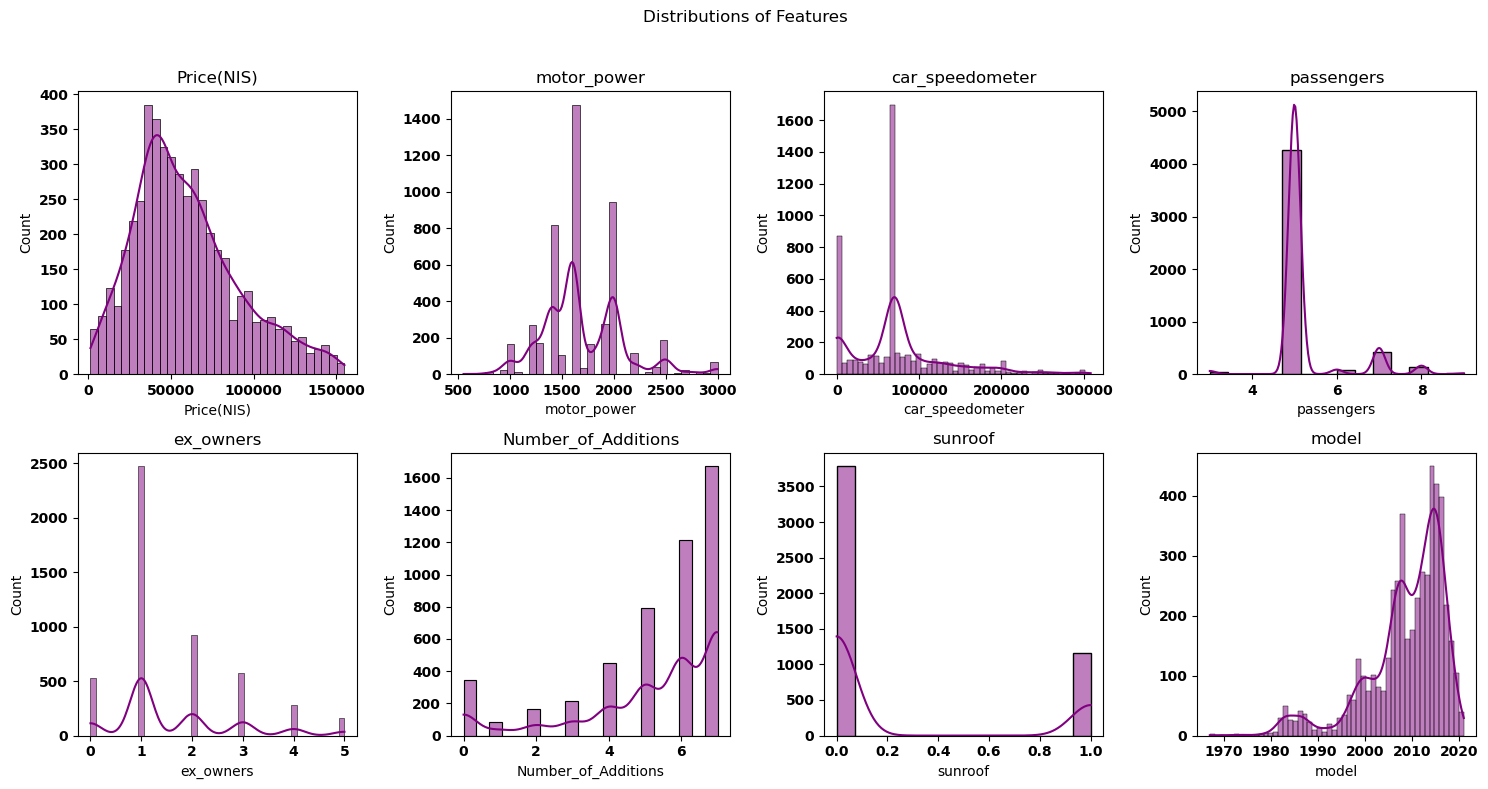

In [134]:
features_to_plot = ['Price(NIS)', 'motor_power', 'car_speedometer', 'passengers', 'ex_owners', 'Number_of_Additions', 'sunroof','model']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distributions of Features')

axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.histplot(cars_data[feature], kde=True,  color='Purple' ,  ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [135]:
def hist_plot (The_feature) : 
    plt.figure(figsize=(8, 6))
    sns.histplot(The_feature, kde=True, color='pink')
    plt.xlabel('price_transformation')
    plt.ylabel('Frequency')
    skewness = The_feature.skew()
    print(f"Skewness: {skewness}")
    plt.show()



In [136]:
def log_transformation (feature_to_tranforme) :
    feature_log_transformation = np.log(feature_to_tranforme)
    return  feature_log_transformation 

In [137]:
def Reciprocal_transformation (feature_to_tranforme) :
    feature_Reciprocal_transformation =   1 / feature_to_tranforme
    return feature_Reciprocal_transformation 

In [138]:
def square_root_transformation (feature_to_tranforme) :
    feature_square_root_transformation = feature_to_tranforme**(1/2)
    return feature_square_root_transformation 

Skewness: -1.3134276067957271


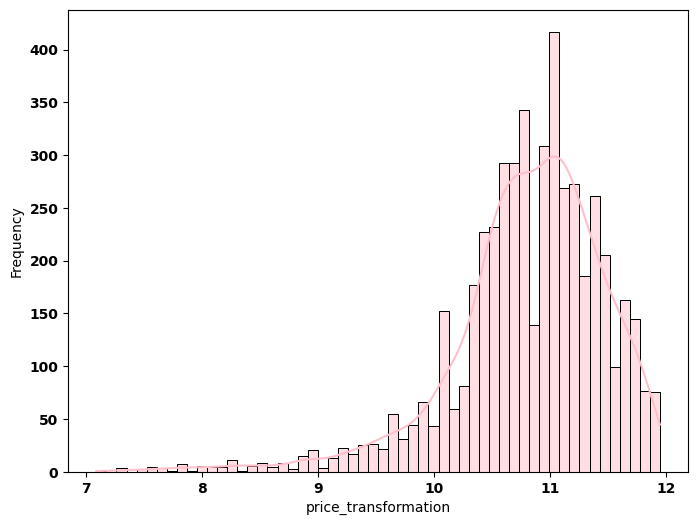

In [139]:
price_log_transformation = log_transformation(cars_data['Price(NIS)'])
hist_plot(price_log_transformation)

Skewness: 8.482810954776367


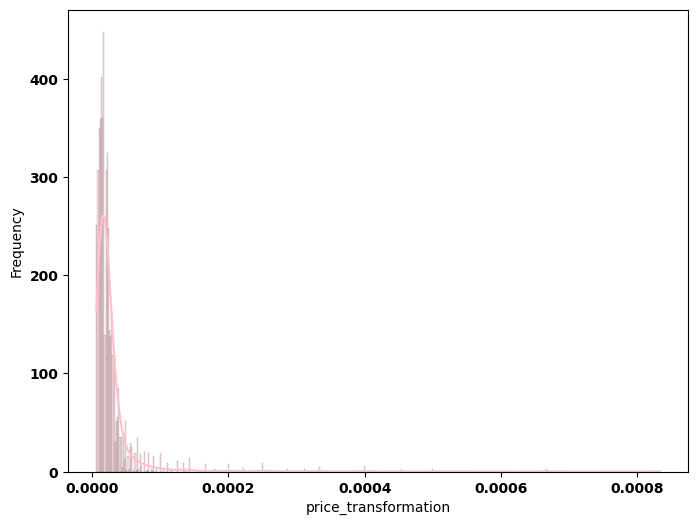

In [140]:
price_Reciprocal_transformation = Reciprocal_transformation(cars_data['Price(NIS)'])
hist_plot(price_Reciprocal_transformation)

Skewness: -0.02694857384311523


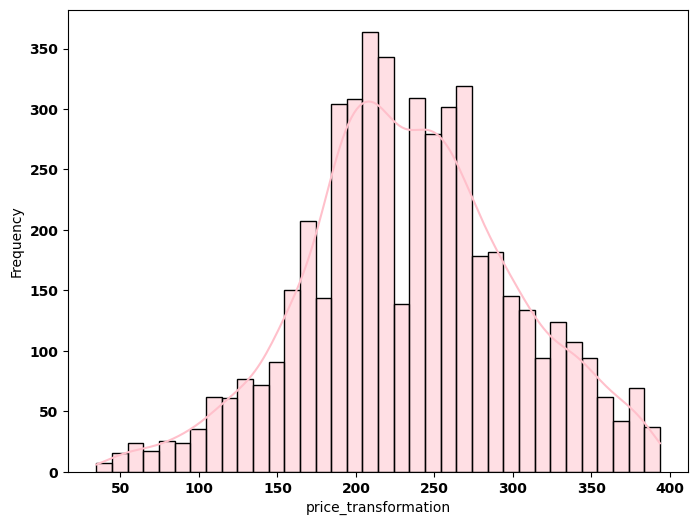

In [141]:
price_square_root_transformation = square_root_transformation(cars_data['Price(NIS)'])
hist_plot(price_square_root_transformation)

Skewness: -0.02694857384311523


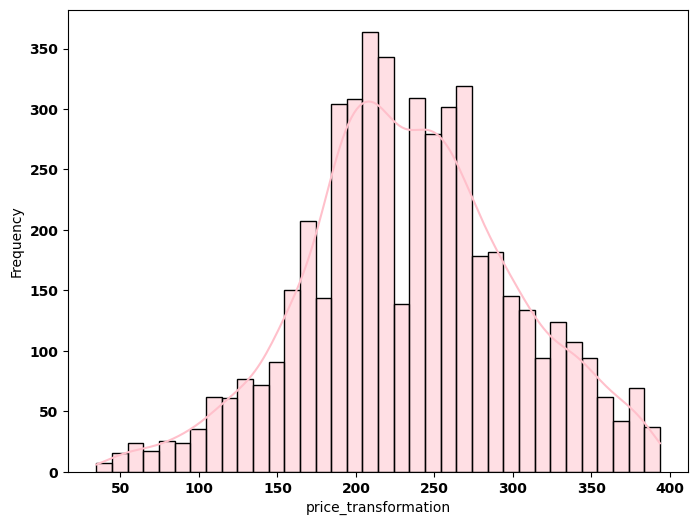

In [142]:
price_square_root_transformation = square_root_transformation(cars_data['Price(NIS)'])
hist_plot(price_square_root_transformation)

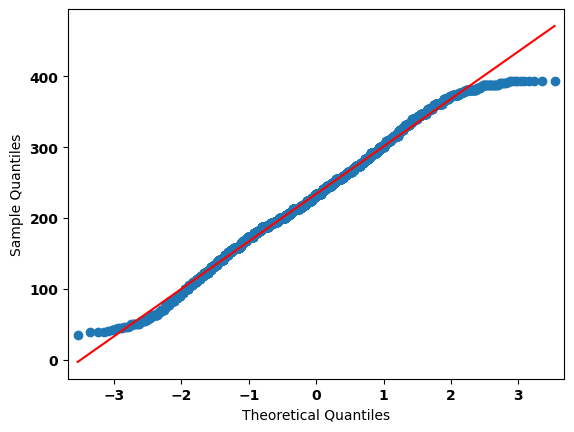

In [143]:
feature_to_plot = price_square_root_transformation
sm.qqplot(feature_to_plot ,  line='s')
plt.show()

# So we choose the square_root transformation 

Skewness: -0.02694857384311523


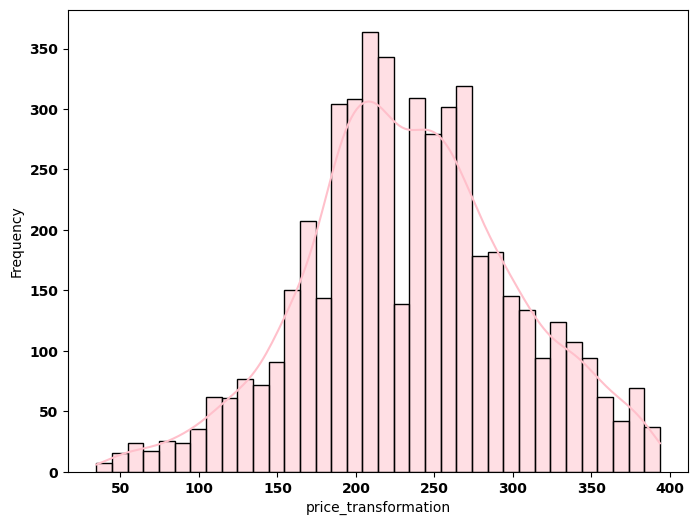

In [144]:
cars_data ['Price(NIS)'] = price_square_root_transformation
hist_plot(cars_data ['Price(NIS)'])

# The Target Variable is approximately normal.

In [145]:
#Try to normlize the passengers 

In [146]:
passengers_log_transformation = log_transformation(cars_data['passengers'])

Skewness: 1.297258064574371


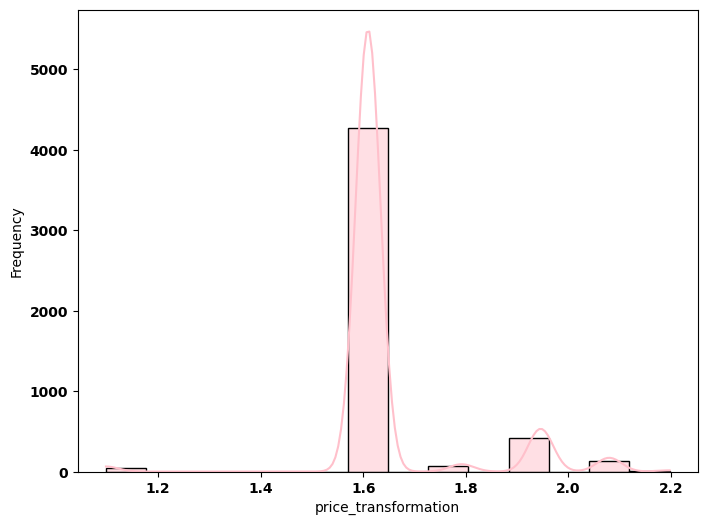

In [147]:
hist_plot(passengers_log_transformation)

In [148]:
passengers_square_root = square_root_transformation(cars_data['passengers'])

Skewness: 1.7958684704473618


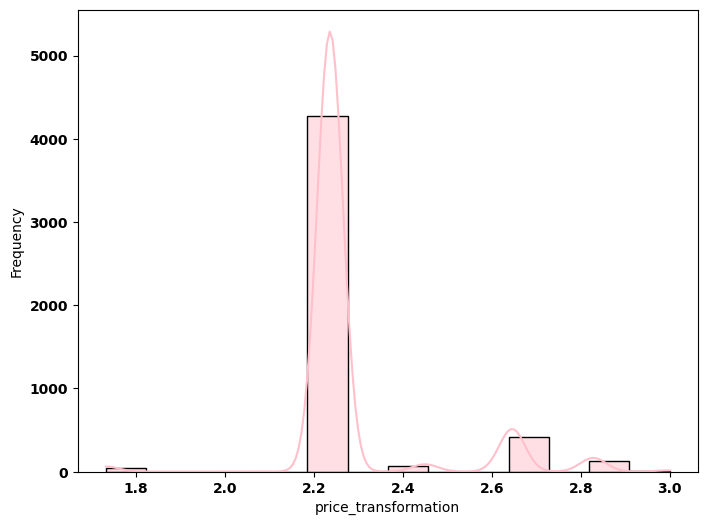

In [149]:
hist_plot(passengers_square_root)

Skewness: 0.38352974838607884


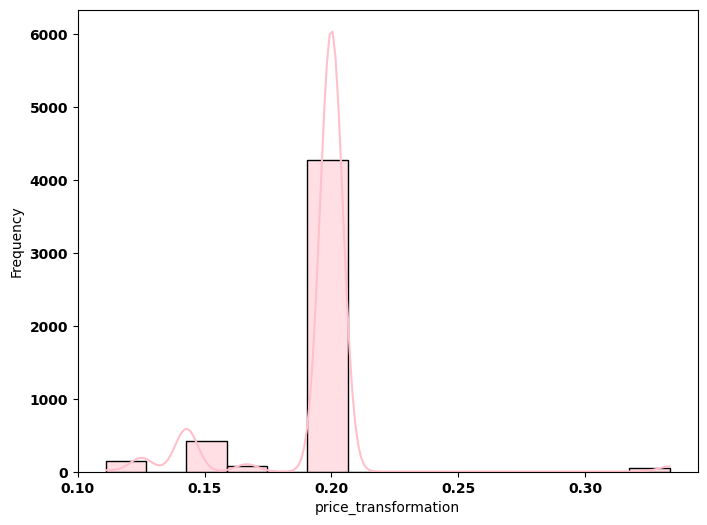

In [150]:
passengers_Reciprocal_transformation =  Reciprocal_transformation(cars_data['passengers'])
hist_plot(passengers_Reciprocal_transformation)

# tranforme data using Reciprocal_transformation

# value of Kurtosis of passengers : 5.342821 before transformation


In [151]:
cars_data['passengers']  = passengers_Reciprocal_transformation

Skewness: 0.38352974838607884


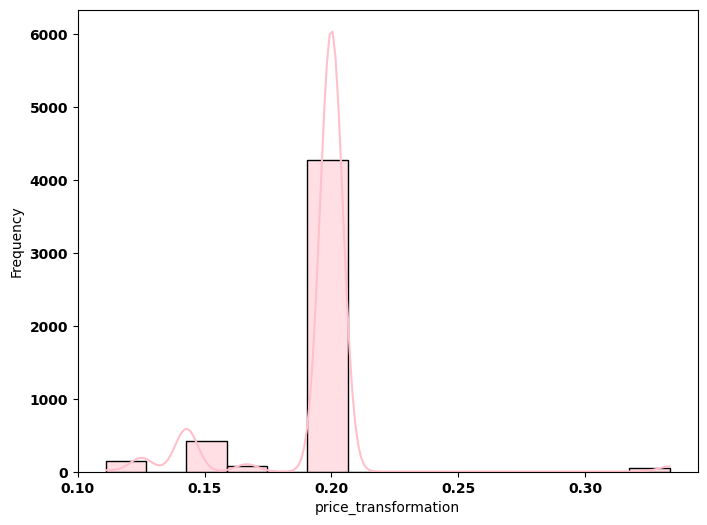

In [152]:
hist_plot(cars_data['passengers'])

In [153]:
cars_data['passengers'].kurt() #WOW :) 

11.14942808318352

In [154]:
cars_data.skew()

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_1556\3188081548.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars_data.skew()


model                 -1.452954
Price(NIS)            -0.026949
motor_power            0.776713
car_speedometer        1.151744
passengers             0.383530
ex_owners              1.065441
Number_of_Additions   -1.310244
sunroof                1.249468
dtype: float64

Skewness: -1.4594182964332791


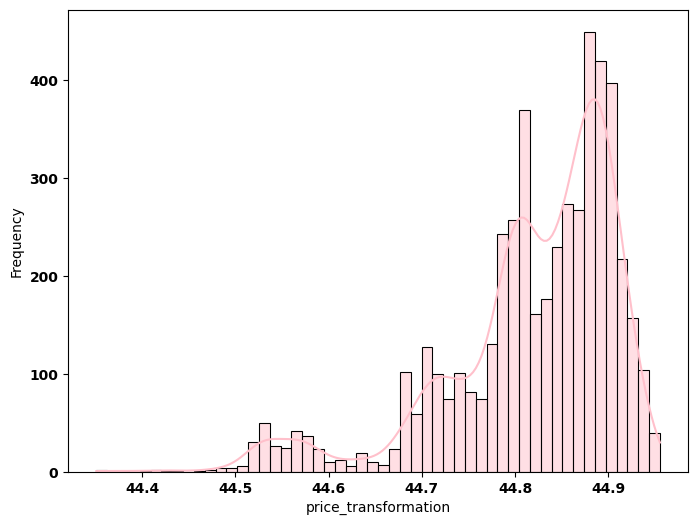

In [155]:
modle_square_root_transformation = square_root_transformation(cars_data['model'])
hist_plot(modle_square_root_transformation)

Skewness: 1.4789063360191164


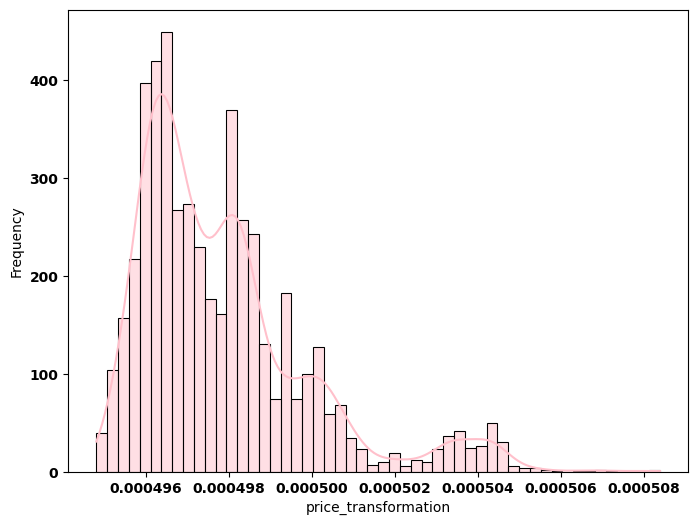

In [156]:
modle_Reciprocal_transformation =  Reciprocal_transformation(cars_data['model'])
hist_plot(modle_Reciprocal_transformation )

Skewness: -1.4658986318877372


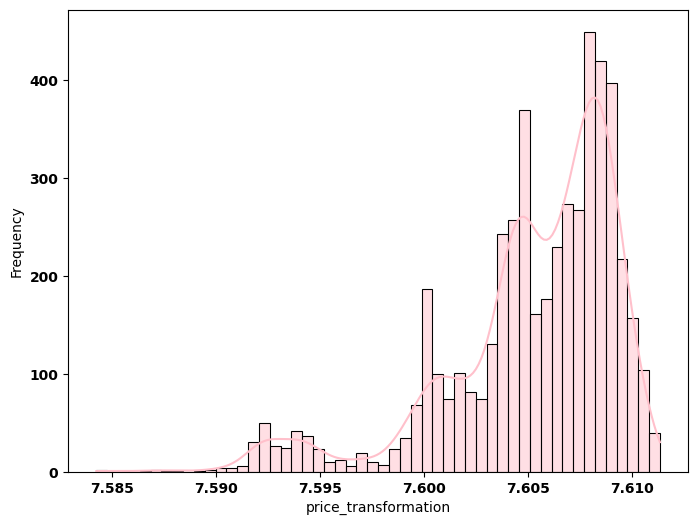

In [157]:
modle_log_transformation = log_transformation(cars_data['model'])
hist_plot(modle_log_transformation)

# NO effect OF Transformation  

# Done of NORMLIZE Features

# Scalling - The numeric data between [0,1] 

In [158]:
cars_data

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,2014,316.227766,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,0.200,1,7,1.0
3,كيا سورينتو,2007,244.948974,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,0.125,2,7,1.0
4,هونداي افانتي,2006,208.566536,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,0.200,1,7,0.0
7,بيجو 208,2014,232.379001,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,0.200,1,5,0.0
9,اوبل كورسا,2015,254.950976,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,0.200,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,2021,339.116499,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,0.200,0,7,0.0
6982,فورد فيستا,2012,173.205081,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,0.200,3,3,0.0
6983,مرسيدس C220,2009,300.000000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,0.200,2,7,1.0
6984,نيسان كشكاي,2014,308.220700,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,0.200,1,6,1.0


In [159]:

def min_max_normalization(dataframe , features_to_normalize): #must be  list 
    dataframe_copy = dataframe.copy()
    scaler = MinMaxScaler()
    dataframe_copy[features_to_normalize] = scaler.fit_transform( dataframe_copy[features_to_normalize])
    return  dataframe_copy

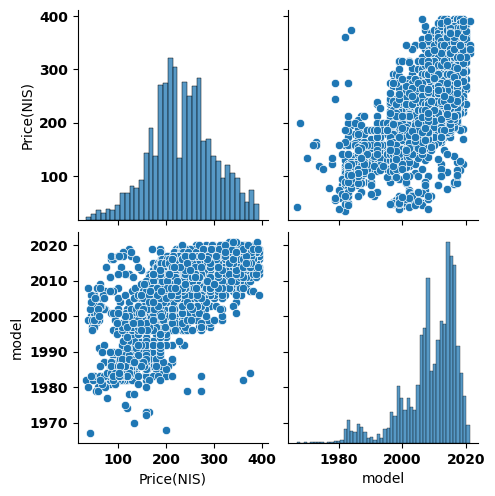

In [160]:
columns_of_interest = ['Price(NIS)', 'model']

# Create a pair plot
sns.pairplot(cars_data[columns_of_interest], height=2.5)
plt.show()

In [161]:
after_normalized = min_max_normalization(cars_data , ['Price(NIS)', 'model'] )
after_normalized

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,0.870370,0.784234,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,0.200,1,7,1.0
3,كيا سورينتو,0.740741,0.585719,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,0.125,2,7,1.0
4,هونداي افانتي,0.722222,0.484392,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,0.200,1,7,0.0
7,بيجو 208,0.870370,0.550711,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,0.200,1,5,0.0
9,اوبل كورسا,0.888889,0.613575,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,0.200,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,1.000000,0.847981,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,0.200,0,7,0.0
6982,فورد فيستا,0.833333,0.385908,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,0.200,3,3,0.0
6983,مرسيدس C220,0.777778,0.739039,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,0.200,2,7,1.0
6984,نيسان كشكاي,0.870370,0.761934,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,0.200,1,6,1.0


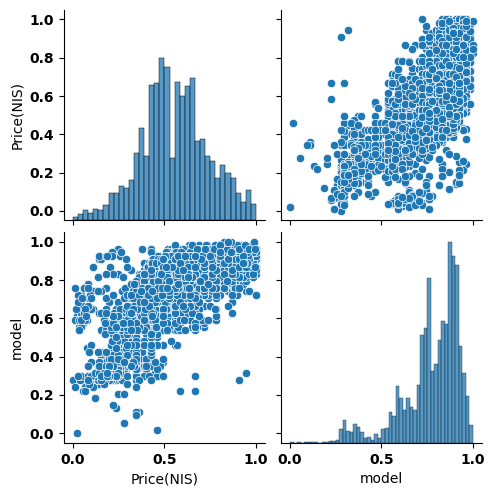

In [162]:
columns_of_interest = ['Price(NIS)', 'model']

# Create a pair plot
sns.pairplot(after_normalized[columns_of_interest], height=2.5)
plt.show()

# This means that the Type of correlation after Scalling was not affected  

In [163]:

def min_max_normalization(dataframe , features_to_normalize): #must be  list 
    scaler = MinMaxScaler()
    dataframe[features_to_normalize] = scaler.fit_transform( dataframe[features_to_normalize])
    return  dataframe

In [164]:
numeric_columns_to_scall = ['Price(NIS)', 'model','motor_power' , 'car_speedometer' , 'passengers' , 'ex_owners' , 'Number_of_Additions' ]
min_max_normalization(cars_data , numeric_columns_to_scall )
cars_data

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,0.870370,0.784234,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.591837,0.242991,0.4000,0.2,1.000000,1.0
3,كيا سورينتو,0.740741,0.585719,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,0.795918,0.421184,0.0625,0.4,1.000000,1.0
4,هونداي افانتي,0.722222,0.484392,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.428571,0.226791,0.4000,0.2,1.000000,0.0
7,بيجو 208,0.870370,0.550711,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.265306,0.123115,0.4000,0.2,0.714286,0.0
9,اوبل كورسا,0.888889,0.613575,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,0.346939,0.399982,0.4000,0.2,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,1.000000,0.847981,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.183673,0.064797,0.4000,0.0,1.000000,0.0
6982,فورد فيستا,0.833333,0.385908,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,0.285714,0.032399,0.4000,0.6,0.428571,0.0
6983,مرسيدس C220,0.777778,0.739039,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.673469,0.583177,0.4000,0.4,1.000000,1.0
6984,نيسان كشكاي,0.870370,0.761934,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.428571,0.226791,0.4000,0.2,0.857143,1.0


# Now compute The corelation between all numeric features and Target Variable 

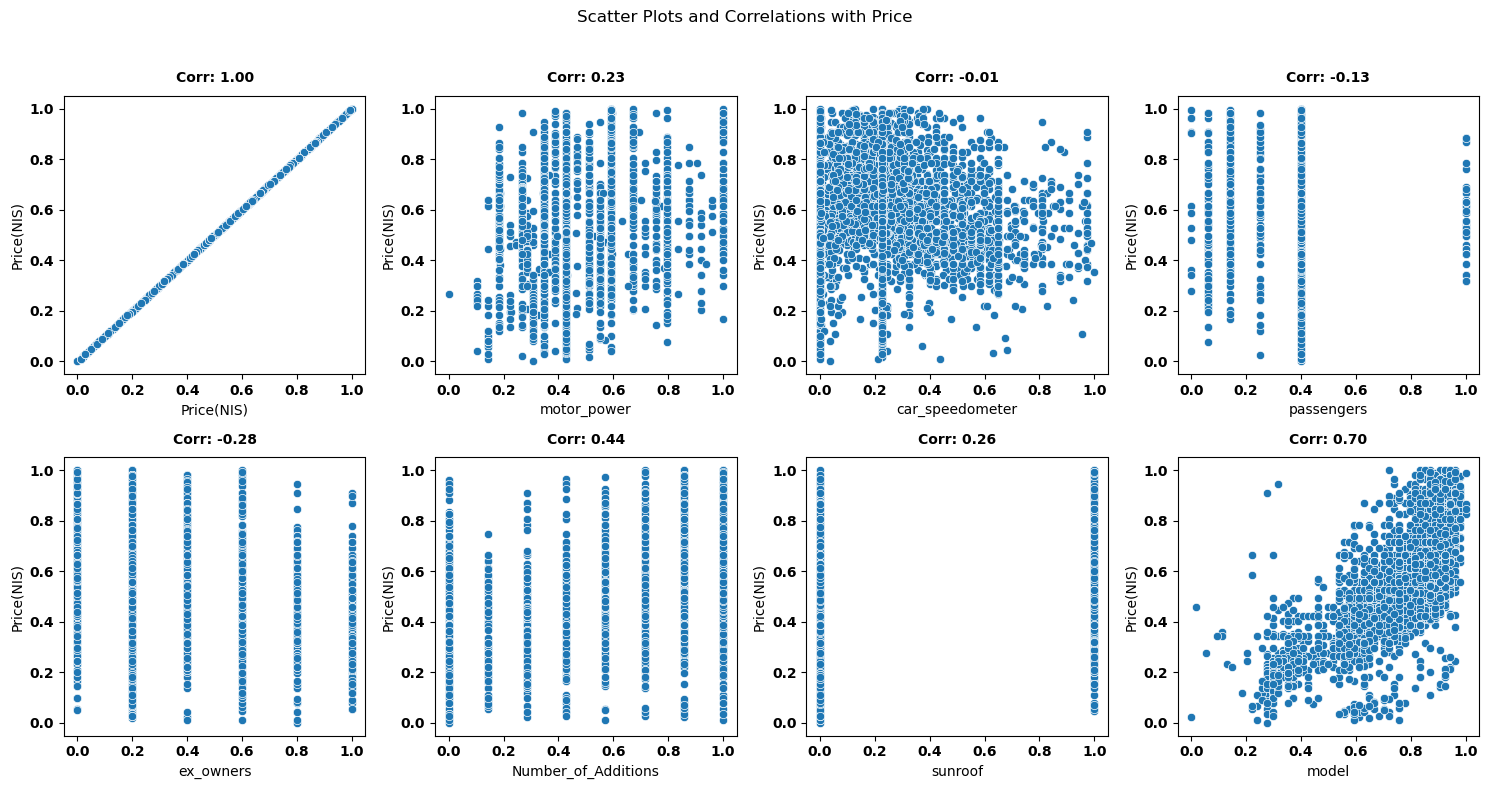

In [165]:
features_to_plot = ['Price(NIS)', 'motor_power', 'car_speedometer', 'passengers', 'ex_owners', 'Number_of_Additions', 'sunroof' ,'model']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Scatter Plots and Correlations with Price')

# Flatten the axes for easier indexing
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=cars_data[feature], y=cars_data['Price(NIS)'], ax=axes[i])
    correlation_coefficient = cars_data[feature].corr(cars_data['Price(NIS)'])
    axes[i].annotate(f'Corr: {correlation_coefficient:.2f}', xy=(0.5, 1.05), xycoords='axes fraction', ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# The strongest relationship is between price and model, which is a positive relationship

# The weakest relationship is between price and the car’s speedometer, and their relationship is negative

# Categorical Feature 

# glass feature

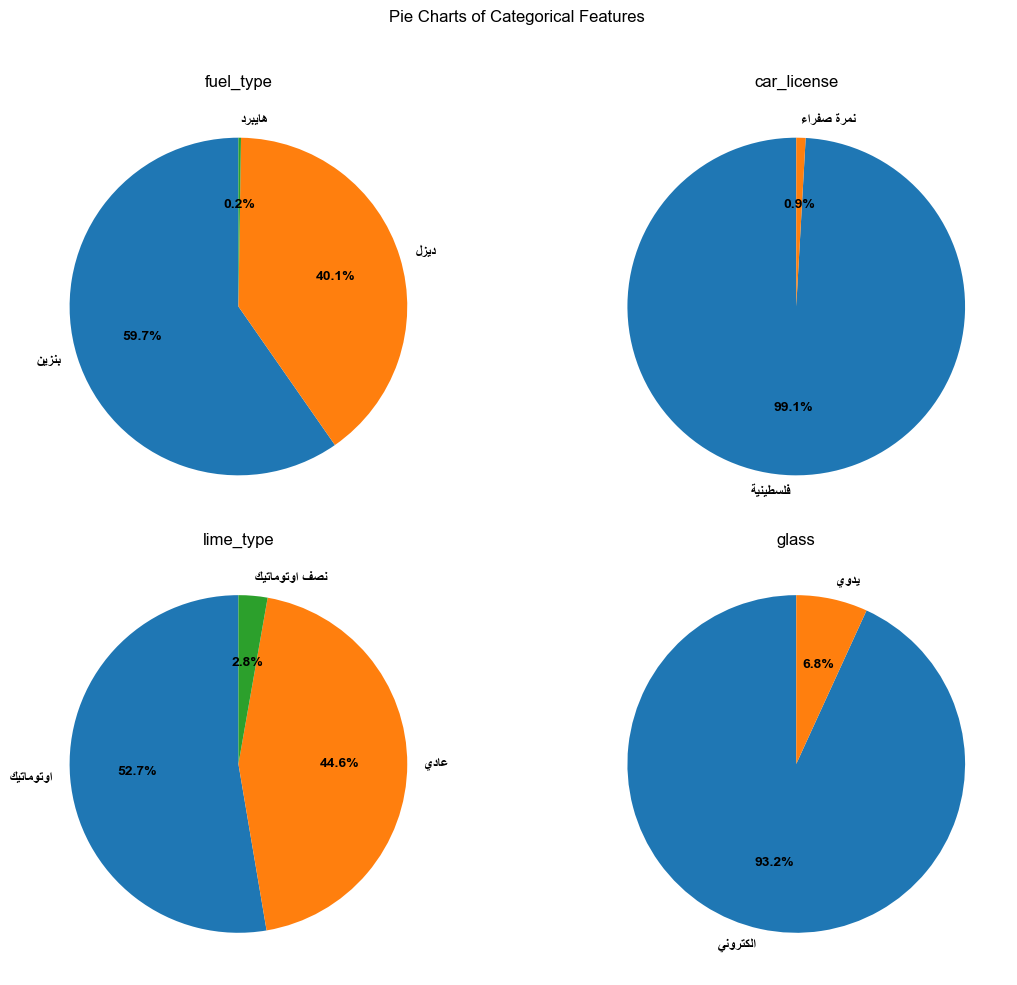

In [166]:
font_properties = {'font.family': 'Arial', 'font.size': 10, 'font.sans-serif': ['Arial'], 'text.usetex': False}
matplotlib.rcParams.update(font_properties)

features_to_plot = ['fuel_type', 'car_license', 'lime_type', 'glass']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Pie Charts of Categorical Features')

# Flatten the axes for easier indexing
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    # Count the occurrences of each category in the feature
    feature_counts = cars_data[feature].value_counts()

    # Reshape and reorder Arabic text
    labels = [get_display(arabic_reshaper.reshape(label)) for label in feature_counts.index]

    # Plot a pie chart
    pie = axes[i].pie(feature_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# This   features are imbalanced

In [167]:
cars_data

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,0.870370,0.784234,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.591837,0.242991,0.4000,0.2,1.000000,1.0
3,كيا سورينتو,0.740741,0.585719,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,0.795918,0.421184,0.0625,0.4,1.000000,1.0
4,هونداي افانتي,0.722222,0.484392,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.428571,0.226791,0.4000,0.2,1.000000,0.0
7,بيجو 208,0.870370,0.550711,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.265306,0.123115,0.4000,0.2,0.714286,0.0
9,اوبل كورسا,0.888889,0.613575,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,0.346939,0.399982,0.4000,0.2,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,1.000000,0.847981,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.183673,0.064797,0.4000,0.0,1.000000,0.0
6982,فورد فيستا,0.833333,0.385908,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,0.285714,0.032399,0.4000,0.6,0.428571,0.0
6983,مرسيدس C220,0.777778,0.739039,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.673469,0.583177,0.4000,0.4,1.000000,1.0
6984,نيسان كشكاي,0.870370,0.761934,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,0.428571,0.226791,0.4000,0.2,0.857143,1.0


In [168]:
cars_data['origin_car'].unique()


array(['خصوصي', 'عمومي', 'تأجير', 'تجاري', 'تدريب سياقة', 'حكومي'],
      dtype=object)

In [169]:
cars_data['color'].unique()

array(['أبيض عاجي', 'سكني', 'فضي', 'بترولي', 'أسود ميتالك', 'أبيض',
       'ذهبي', 'فيراني', 'أحمر', 'أزرق', 'أزرق سماوي', 'رمادي',
       'عدة الوان', 'أسود', 'رصاصي', 'برتقالي', 'بني', 'خمري', 'كحلي',
       'بنفسجي', 'زيتي', 'أخضر', 'بيج', 'جيشي', 'أصفر', 'كرميدي'],
      dtype=object)

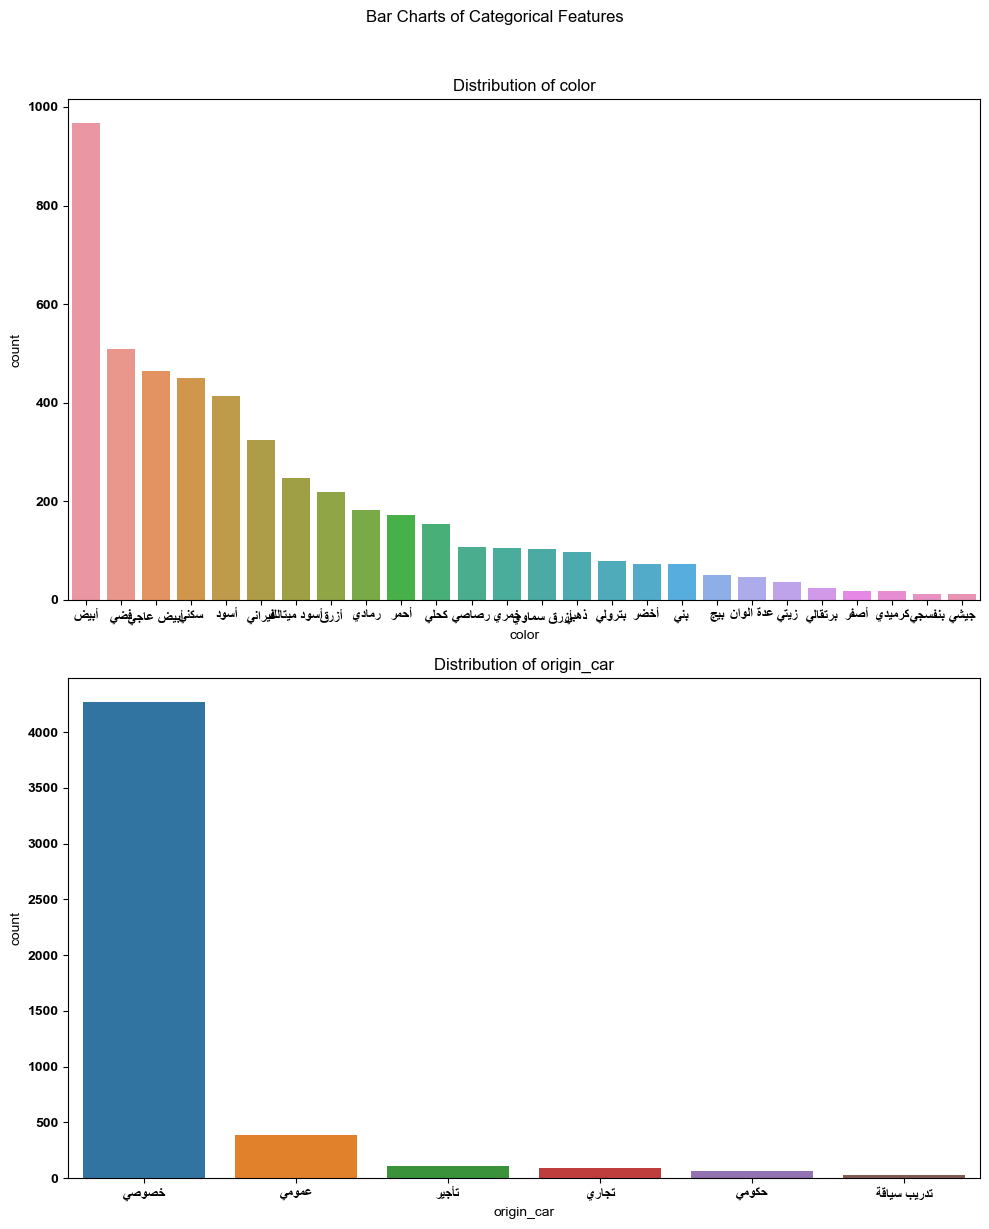

In [170]:
categorical_features = ['color', 'origin_car']
fig, axes = plt.subplots(nrows=len(categorical_features), figsize=(10, 6 * len(categorical_features)))
fig.suptitle('Bar Charts of Categorical Features', y=1.02)
for i, feature in enumerate(categorical_features):
    feature_counts = cars_data[feature].value_counts()
    labels = [get_display(arabic_reshaper.reshape(label)) for label in feature_counts.index]
    sns.countplot(x=feature, data=cars_data, ax=axes[i], order=feature_counts.index)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xticklabels(labels)
plt.tight_layout()
plt.show()


# Convert the  features from nominal to Numeric 

# the features that have two - values use LabelEncoder to convert it 

In [171]:
def Label_Encoder(The_feature):
    label_encoder = LabelEncoder()
    The_feature_encoded = label_encoder.fit_transform(The_feature)
    return The_feature_encoded

In [172]:
features_that_have_two_values = ['car_license', 'glass']
for feature in features_that_have_two_values:
    cars_data[feature] = Label_Encoder(cars_data[feature])


In [173]:
cars_data 

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,0.870370,0.784234,أبيض عاجي,بنزين,خصوصي,0,اوتوماتيك,0,0.591837,0.242991,0.4000,0.2,1.000000,1.0
3,كيا سورينتو,0.740741,0.585719,سكني,ديزل,خصوصي,0,نصف اوتوماتيك,0,0.795918,0.421184,0.0625,0.4,1.000000,1.0
4,هونداي افانتي,0.722222,0.484392,سكني,بنزين,خصوصي,0,اوتوماتيك,0,0.428571,0.226791,0.4000,0.2,1.000000,0.0
7,بيجو 208,0.870370,0.550711,فضي,بنزين,خصوصي,0,اوتوماتيك,0,0.265306,0.123115,0.4000,0.2,0.714286,0.0
9,اوبل كورسا,0.888889,0.613575,بترولي,بنزين,خصوصي,0,عادي,0,0.346939,0.399982,0.4000,0.2,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,1.000000,0.847981,أحمر,بنزين,خصوصي,0,اوتوماتيك,0,0.183673,0.064797,0.4000,0.0,1.000000,0.0
6982,فورد فيستا,0.833333,0.385908,سكني,بنزين,خصوصي,0,عادي,0,0.285714,0.032399,0.4000,0.6,0.428571,0.0
6983,مرسيدس C220,0.777778,0.739039,فيراني,ديزل,خصوصي,0,اوتوماتيك,0,0.673469,0.583177,0.4000,0.4,1.000000,1.0
6984,نيسان كشكاي,0.870370,0.761934,فيراني,ديزل,خصوصي,0,اوتوماتيك,0,0.428571,0.226791,0.4000,0.2,0.857143,1.0


# Now use one-hot encoding to convert feature which contains more than two values (classes)

In [174]:
def OneHot_Encoder(data, column):
    onehot_encoded_columns = pd.get_dummies(data[column], prefix=f'{column}-')
    data = pd.concat([data, onehot_encoded_columns], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data

In [175]:
features_have_more_than_two_values = ['Name','color', 'fuel_type','origin_car','lime_type']
for feature in features_have_more_than_two_values:
    cars_data= OneHot_Encoder(cars_data ,feature)


In [176]:
cars_data.reset_index()

,index,model,Price(NIS),car_license,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,...,fuel_type-_هايبرد,origin_car-_تأجير,origin_car-_تجاري,origin_car-_تدريب سياقة,origin_car-_حكومي,origin_car-_خصوصي,origin_car-_عمومي,lime_type-_اوتوماتيك,lime_type-_عادي,lime_type-_نصف اوتوماتيك
0,0,0.870370,0.784234,0,0,0.591837,0.242991,0.4000,0.2,1.000000,...,0,0,0,0,0,1,0,1,0,0
1,3,0.740741,0.585719,0,0,0.795918,0.421184,0.0625,0.4,1.000000,...,0,0,0,0,0,1,0,0,0,1
2,4,0.722222,0.484392,0,0,0.428571,0.226791,0.4000,0.2,1.000000,...,0,0,0,0,0,1,0,1,0,0
3,7,0.870370,0.550711,0,0,0.265306,0.123115,0.4000,0.2,0.714286,...,0,0,0,0,0,1,0,1,0,0
4,9,0.888889,0.613575,0,0,0.346939,0.399982,0.4000,0.2,1.000000,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,6981,1.000000,0.847981,0,0,0.183673,0.064797,0.4000,0.0,1.000000,...,0,0,0,0,0,1,0,1,0,0
4942,6982,0.833333,0.385908,0,0,0.285714,0.032399,0.4000,0.6,0.428571,...,0,0,0,0,0,1,0,0,1,0
4943,6983,0.777778,0.739039,0,0,0.673469,0.583177,0.4000,0.4,1.000000,...,0,0,0,0,0,1,0,1,0,0
4944,6984,0.870370,0.761934,0,0,0.428571,0.226791,0.4000,0.2,0.857143,...,0,0,0,0,0,1,0,1,0,0



# Now the data is ready to use 

In [177]:
X = cars_data.drop(['Price(NIS)'],axis=1)  
y = cars_data['Price(NIS)']  

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [332]:
models = {
    'Linear Regression (Degree 1)': LinearRegression(),
    'Ridge Regression (Degree 1)': Ridge(alpha=1.0),
    'Lasso Regression (Degree 1)': Lasso(alpha=1.0),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0)),
    'Lasso Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1.0)),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3),
    'Decision Tree': DecisionTreeRegressor(random_state=0)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    results[model_name] = {
        'MSE_train': mse_train,
        'R2_train': r2_train,
        'MSE_test': mse_test,
        'R2_test': r2_test
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"R-squared (Training): {metrics['R2_train']}")
    print(f"R-squared (Testing): {metrics['R2_test']}")
    
    print(f"Mean Squared Error (Training): {metrics['MSE_train']}")
    print(f"Mean Squared Error (Testing): {metrics['MSE_test']}")


Linear Regression (Degree 1):
R-squared (Training): 0.8590414261282553
R-squared (Testing): -4.377152074964761e+19
Mean Squared Error (Training): 0.004817314454157538
Mean Squared Error (Testing): 1.635786825066841e+18
Ridge Regression (Degree 1):
R-squared (Training): 0.8456910183602393
R-squared (Testing): 0.7928622692858215
Mean Squared Error (Training): 0.005273569866959013
Mean Squared Error (Testing): 0.007740950395908376
Lasso Regression (Degree 1):
R-squared (Training): 0.0
R-squared (Testing): -0.0004996010914921634
Mean Squared Error (Training): 0.0341753915483049
Mean Squared Error (Testing): 0.037389700835634525
Polynomial Regression (Degree 2):
R-squared (Training): 0.9594533955779442
R-squared (Testing): -7.196364751207202e+21
Mean Squared Error (Training): 0.0013856960820779875
Mean Squared Error (Testing): 2.689355646501025e+20
Ridge Regression (Degree 2):
R-squared (Training): 0.9401354600084536
R-squared (Testing): 0.7974223935561945
Mean Squared Error (Training): 0.0

# The Best Model for use is Ridge Regression (Degree 1)


# R-squerd for it 0.8 and MSE = 0.0077

In [179]:
# Assuming you have the results available in variables like r2_train, r2_test, mse_train, mse_test
results_dict = {
    'Linear Regression (Degree 1)': {
        'R-squared (Training)': 0.8590414261282553,
        'R-squared (Testing)': -4.377152074964761e+19,
        'Mean Squared Error (Training)': 0.004817314454157538,
        'Mean Squared Error (Testing)': 1.635786825066841e+18,
    },
    'Ridge Regression (Degree 1)': {
        'R-squared (Training)': 0.8456910183602393,
        'R-squared (Testing)': 0.7928622692858215,
        'Mean Squared Error (Training)': 0.005273569866959013,
        'Mean Squared Error (Testing)': 0.007740950395908376,
    },
    'Lasso Regression (Degree 1)': {
        'R-squared (Training)': 0.0,
        'R-squared (Testing)': -0.0004996010914921634,
        'Mean Squared Error (Training)': 0.0341753915483049,
        'Mean Squared Error (Testing)': 0.037389700835634525,
    },
    'Polynomial Regression (Degree 2)': {
        'R-squared (Training)': 0.9594533955779442,
        'R-squared (Testing)': -7.196364751207202e+21,
        'Mean Squared Error (Training)': 0.0013856960820779875,
        'Mean Squared Error (Testing)': 2.689355646501025e+20,
    },
    'Ridge Regression (Degree 2)': {
        'R-squared (Training)': 0.9401354600084536,
        'R-squared (Testing)': 0.7974223935561945,
        'Mean Squared Error (Training)': 0.002045894094070254,
        'Mean Squared Error (Testing)': 0.007570533853956182,
    },
    'Lasso Regression (Degree 2)': {
        'R-squared (Training)': 0.0,
        'R-squared (Testing)': -0.0004996010914921634,
        'Mean Squared Error (Training)': 0.0341753915483049,
        'Mean Squared Error (Testing)': 0.037389700835634525,
    },
    'K-Nearest Neighbors': {
        'R-squared (Training)': 0.8119308307004252,
        'R-squared (Testing)': 0.6008887607152252,
        'Mean Squared Error (Training)': 0.006427337498977414,
        'Mean Squared Error (Testing)': 0.014915198187702674,
    },
    'Decision Tree': {
        'R-squared (Training)': 0.999869942636763,
        'R-squared (Testing)': 0.6482851582333176,
        'Mean Squared Error (Training)': 4.444761312365821e-06,
        'Mean Squared Error (Testing)': 0.013143945983348991,
    },
}



In [369]:
#TO print the result in clear way

In [180]:
for model_name, metrics in results_dict.items():
    print(model_name + ":")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Linear Regression (Degree 1):
R-squared (Training): 0.8590414261282553
R-squared (Testing): -4.377152074964761e+19
Mean Squared Error (Training): 0.004817314454157538
Mean Squared Error (Testing): 1.635786825066841e+18

Ridge Regression (Degree 1):
R-squared (Training): 0.8456910183602393
R-squared (Testing): 0.7928622692858215
Mean Squared Error (Training): 0.005273569866959013
Mean Squared Error (Testing): 0.007740950395908376

Lasso Regression (Degree 1):
R-squared (Training): 0.0
R-squared (Testing): -0.0004996010914921634
Mean Squared Error (Training): 0.0341753915483049
Mean Squared Error (Testing): 0.037389700835634525

Polynomial Regression (Degree 2):
R-squared (Training): 0.9594533955779442
R-squared (Testing): -7.196364751207202e+21
Mean Squared Error (Training): 0.0013856960820779875
Mean Squared Error (Testing): 2.689355646501025e+20

Ridge Regression (Degree 2):
R-squared (Training): 0.9401354600084536
R-squared (Testing): 0.7974223935561945
Mean Squared Error (Training):

In [181]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
    
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared (Training):" ,r2_train )
print(f"R-squared (Testing): " , r2_test)
    
print(f"Mean Squared Error (Training):" ,mse_train )
print(f"Mean Squared Error (Testing):",mse_test)


R-squared (Training): 0.8456910183602393
R-squared (Testing):  0.7928622692858215
Mean Squared Error (Training): 0.005273569866959013
Mean Squared Error (Testing): 0.007740950395908376


In [184]:
with open('ridge_model.pkl', 'wb') as model_file:
    pickle.dump(ridge_model, model_file)